# 1. INITIAL SETUP

In [2]:
# =============================================================================
# SETUP CELL: IMPORTS AND GLOBAL PARAMETERS
# =============================================================================

# --- Standard Library Imports ---
import warnings
import logging
import os
import time

#!pip install umap-learn
# --- Data Analysis and Numerical Imports ---
import numpy as np
import pandas as pd
from scipy import stats

# --- Imports de Machine Learning (Scikit-learn) ---
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, HDBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import (
    silhouette_score, 
    davies_bouldin_score, 
    calinski_harabasz_score
)
from sklearn.preprocessing import MinMaxScaler # For visualisation

# --- Astronomical Library Imports ---
from astropy.timeseries import LombScargle
from astropy import units as u

# --- Dimensionality Reduction and Visualisation Imports ---
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# --- Global Settings ---
# Suppress warnings for a clean notebook
warnings.filterwarnings('ignore')

# Logging configuration
logging.basicConfig(level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

# Random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
logger.info(f"Global random seed set to {RANDOM_STATE}")

# Visualisation Settings (Matplotlib and Seaborn)
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.format'] = 'pdf' # Vector format for publications

# Directory for saving figures
FIG_DIR = "figures"
if not os.path.exists(FIG_DIR):
    os.makedirs(FIG_DIR)
    logger.info(f"Figures directory created at: {FIG_DIR}")

# --- Helper Functions ---
def save_figure(fig, name, tight_layout=True):
    """
    Saves a matplotlib figure in multiple formats (PDF, PNG) 
    in the defined figures directory.
    """
    if tight_layout:
        plt.tight_layout()
        
    path_pdf = os.path.join(FIG_DIR, f"{name}.pdf")
    path_png = os.path.join(FIG_DIR, f"{name}.png")
    
    fig.savefig(path_pdf, bbox_inches='tight')
    fig.savefig(path_png, bbox_inches='tight')
    logger.info(f"Figura salva em {path_pdf} e {path_png}")


def sm():
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",top = True,right = True, length=5,width=1,labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",top = True,right = True, length=8,width=1,labelsize=15)
    plt.tick_params(axis='both',which='minor', direction = "in",bottom = True,right = True, length=5,width=1,labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",bottom = True,right = True, length=8,width=1,labelsize=15)



logger.info("Ambiente configurado com sucesso.")

2026-02-12 20:16:27,836 - INFO - Semente aleatória global definida como 42
2026-02-12 20:16:27,840 - INFO - Ambiente configurado com sucesso.


In [3]:
# =============================================================================
# LOCAL REGISTRATION OF COURIER PRIME FONT (EMBEDDED IN PROJECT)
# =============================================================================
import matplotlib.font_manager as fm
from pathlib import Path

FONT_DIR = Path("fonts")

for font_path in FONT_DIR.glob("*.ttf"):
    fm.fontManager.addfont(str(font_path))

# Explicit verification
available_fonts = {f.name for f in fm.fontManager.ttflist}
assert "Courier Prime" in available_fonts, "Courier Prime NOT found!"

print("Courier Prime registered successfully.")

Courier Prime registrada com sucesso.


In [4]:
import matplotlib.font_manager as fm

[f.name for f in fm.fontManager.ttflist if "Courier Prime" in f.name]


# =============================================================================
# GLOBAL FONT CONFIGURATION – PAPER (Courier Prime)
# =============================================================================
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams.update({

    # Main font
    "font.family": "monospace",
    "font.monospace": ["Courier Prime"],

    # Base sizes (fine-tune later if needed)
    "font.size": 13,
    "axes.labelsize": 14,
    "axes.titlesize": 15,
    "legend.fontsize": 12,

    # Mathtext (important for labels with symbols)
    "mathtext.fontset": "custom",
    "mathtext.rm": "Courier Prime",
    "mathtext.it": "Courier Prime:italic",
    "mathtext.bf": "Courier Prime:bold",

    # Axis appearance (paper-grade)
    "axes.linewidth": 1.0,

    # Export settings
    "pdf.fonttype": 42,   # TrueType → garante embedding da fonte
    "ps.fonttype": 42,

    "savefig.format": "pdf",
    "savefig.dpi": 300,
})

In [5]:
import sys
!{sys.executable} -m pip install umap-learn

In [6]:
# =============================================================================
# VERSION CHECK CELL
# =============================================================================
import sys
import sklearn
import astropy
import statsmodels
import plotly

logger.info(f"Python version: {sys.version.split()}")
logger.info(f"NumPy version: {np.__version__}")
logger.info(f"Pandas version: {pd.__version__}")
logger.info(f"Scikit-learn version: {sklearn.__version__}")
logger.info(f"Astropy version: {astropy.__version__}")
logger.info(f"UMAP version: {umap.__version__}")
logger.info(f"Plotly version: {plotly.__version__}")
logger.info(f"Seaborn version: {sns.__version__}")

2026-02-12 20:16:31,017 - INFO - Versão Python: ['3.12.3', '(main,', 'Jan', '8', '2026,', '11:30:50)', '[GCC', '13.3.0]']
2026-02-12 20:16:31,019 - INFO - Versão NumPy: 2.2.6
2026-02-12 20:16:31,021 - INFO - Versão Pandas: 2.3.2
2026-02-12 20:16:31,022 - INFO - Versão Scikit-learn: 1.7.2
2026-02-12 20:16:31,025 - INFO - Versão Astropy: 7.1.0
2026-02-12 20:16:31,026 - INFO - Versão UMAP: 0.5.9.post2
2026-02-12 20:16:31,027 - INFO - Versão Plotly: 6.3.0
2026-02-12 20:16:31,028 - INFO - Versão Seaborn: 0.13.2


In [7]:
from matplotlib.ticker import AutoMinorLocator

def sm_ted(ax=None, labelsize=15, minor_len=5, major_len=8, width=1):
    """
    Applies SuperMongo-style formatting to an axis (ax).
    If ax=None, applies to the current axis (plt.gca()).
    """
    if ax is None:
        ax = plt.gca()

    # Minor ticks (on both axes)
    ax.minorticks_on()
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    # Ticks: major/minor, on all edges
    ax.tick_params(axis='both', which='minor',
                   direction='in', top=True, right=True,
                   length=minor_len, width=width, labelsize=labelsize)
    ax.tick_params(axis='both', which='major',
                   direction='in', top=True, right=True,
                   length=major_len, width=width, labelsize=labelsize)

    # Also ensures bottom/left (for safety)
    ax.tick_params(axis='both', which='minor',
                   direction='in', bottom=True, left=True)
    ax.tick_params(axis='both', which='major',
                   direction='in', bottom=True, left=True)

    return ax

In [8]:
# =============================================================================
# DATA LOADING CELL
# =============================================================================
logger.info("Starting Step 2.1: Data Acquisition...")

# --- Data file paths ---
DATA_PATH_TS = "table3.csv"
DATA_PATH_PARAMS = "table2.csv"
DATA_PATH_CYCLES = "table4.csv"

# --- Load Time Series (Main Input) ---
try:
    df_timeseries = pd.read_csv(DATA_PATH_TS)
    logger.info(f"Carregado {DATA_PATH_TS}: {df_timeseries.shape} observations")
except FileNotFoundError:
    logger.error(f"ERRO: Arquivo {DATA_PATH_TS} not found.")
    # Add backup download logic here if needed
    df_timeseries = pd.DataFrame() # Placeholder

# --- Load Stellar Parameters (Validation) ---
try:
    df_params = pd.read_csv(DATA_PATH_PARAMS)
    logger.info(f"Carregado {DATA_PATH_PARAMS}: {df_params.shape} stars (for validation)")
except FileNotFoundError:
    logger.error(f"ERRO: Arquivo {DATA_PATH_PARAMS} not found.")
    df_params = pd.DataFrame()

# --- Load Known Cycles (Validation) ---
try:
    df_cycles = pd.read_csv(DATA_PATH_CYCLES)
    logger.info(f"Carregado {DATA_PATH_CYCLES}: {df_cycles.shape} cycles (for validation)")
except FileNotFoundError:
    logger.error(f"ERRO: Arquivo {DATA_PATH_CYCLES} not found.")
    df_cycles = pd.DataFrame()

logger.info("Data loaded. Starting time series preprocessing...")


# --- Time Series Cleaning and Preprocessing (df_timeseries) ---
if not df_timeseries.empty:
    # Rename columns for clarity and consistency
    df_timeseries = df_timeseries.rename(columns={
        'Name': 'star_id',
        'BJD': 'time_bjd',
        'S': 's_index'
    })

    # FIX: Strip whitespace from star names
    df_timeseries['star_id'] = df_timeseries['star_id'].str.strip()

    # Select only the necessary columns
    cols_to_keep = ['star_id', 'time_bjd', 's_index']
    df_timeseries = df_timeseries[cols_to_keep]

    # Converter BJD (dias) para Anos Decimais. 
    # BJD in table3.csv is BJD-2440000 [4]
    df_timeseries['time_yr'] = df_timeseries['time_bjd'] / 365.25

    # Verificar NaNs nos dados de entrada
    nan_count = df_timeseries.isna().sum().sum()
    logger.info(f"Total de valores NaN encontrados nas time series brutas: {nan_count}")

    # Remover quaisquer linhas com NaNs no S-index ou no tempo
    df_timeseries = df_timeseries.dropna()

    # Check the number of unique stars
    n_unique_stars = df_timeseries['star_id'].nunique()
    logger.info(f"Dados de time series limpos para {n_unique_stars} unique stars.")

    # Display the header of processed data
    print("\n--- Time Series Header Processadas (df_timeseries) ---")
    print(df_timeseries.head())
else:
    logger.error("Time series DataFrames are empty. Aborting.")

# --- Validation data cleaning ---
if not df_params.empty:
    df_params = df_params.rename(columns={'Name': 'star_id'})
    # FIX: Strip whitespace from star names [4]
    df_params['star_id'] = df_params['star_id'].str.strip()

if not df_cycles.empty:
    df_cycles = df_cycles.rename(columns={'Name': 'star_id', 'Per': 'val_period'})
    # FIX: Strip whitespace from star names [4]
    df_cycles['star_id'] = df_cycles['star_id'].str.strip()

2026-02-12 20:16:31,055 - INFO - Iniciando Etapa 2.1: Aquisição de Dados...
2026-02-12 20:16:31,151 - INFO - Carregado table3.csv: (52372, 7) observações
2026-02-12 20:16:31,158 - INFO - Carregado table2.csv: (710, 14) estrelas (para validação)
2026-02-12 20:16:31,161 - INFO - Carregado table4.csv: (138, 6) ciclos (para validação)
2026-02-12 20:16:31,162 - INFO - Dados carregados. Iniciando pré-processamento de séries temporais...
2026-02-12 20:16:31,191 - INFO - Total de valores NaN encontrados nas séries temporais brutas: 0
2026-02-12 20:16:31,204 - INFO - Dados de séries temporais limpos para 710 estrelas únicas.



--- Cabeçalho das Séries Temporais Processadas (df_timeseries) ---
     star_id   time_bjd  s_index    time_yr
0  HD 185144  13237.736   0.2112  36.242946
1  HD 185144  13237.738   0.2120  36.242951
2  HD 185144  13237.739   0.2094  36.242954
3  HD 185144  13237.740   0.2118  36.242957
4  HD 185144  13237.740   0.2094  36.242957


In [9]:
#grouped_ts.sample(2)

2026-02-12 20:16:31,230 - INFO - Plotando séries temporais de exemplo...
2026-02-12 20:16:32,109 - INFO - maxp pruned
2026-02-12 20:16:32,114 - INFO - cmap pruned
2026-02-12 20:16:32,119 - INFO - post pruned
2026-02-12 20:16:32,123 - INFO - glyf pruned
2026-02-12 20:16:32,125 - INFO - Added gid0 to subset
2026-02-12 20:16:32,126 - INFO - Added first four glyphs to subset
2026-02-12 20:16:32,128 - INFO - Closing glyph list over 'glyf': 41 glyphs before
2026-02-12 20:16:32,131 - INFO - Glyph names: ['.notdef', 'A', 'B', 'D', 'E', 'H', 'I', 'J', 'NULL', 'S', 'a', 'colon', 'd', 'e', 'eight', 'five', 'four', 'hyphen', 'i', 'l', 'm', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'v', 'x', 'zero']
2026-02-12 20:16:32,133 - INFO - Glyph IDs:   [0, 1, 2, 3, 8, 9, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 33, 34, 36, 37, 40, 41, 42, 51, 65, 68, 69, 73, 75, 76, 77, 78, 79, 81, 82, 84, 86, 17

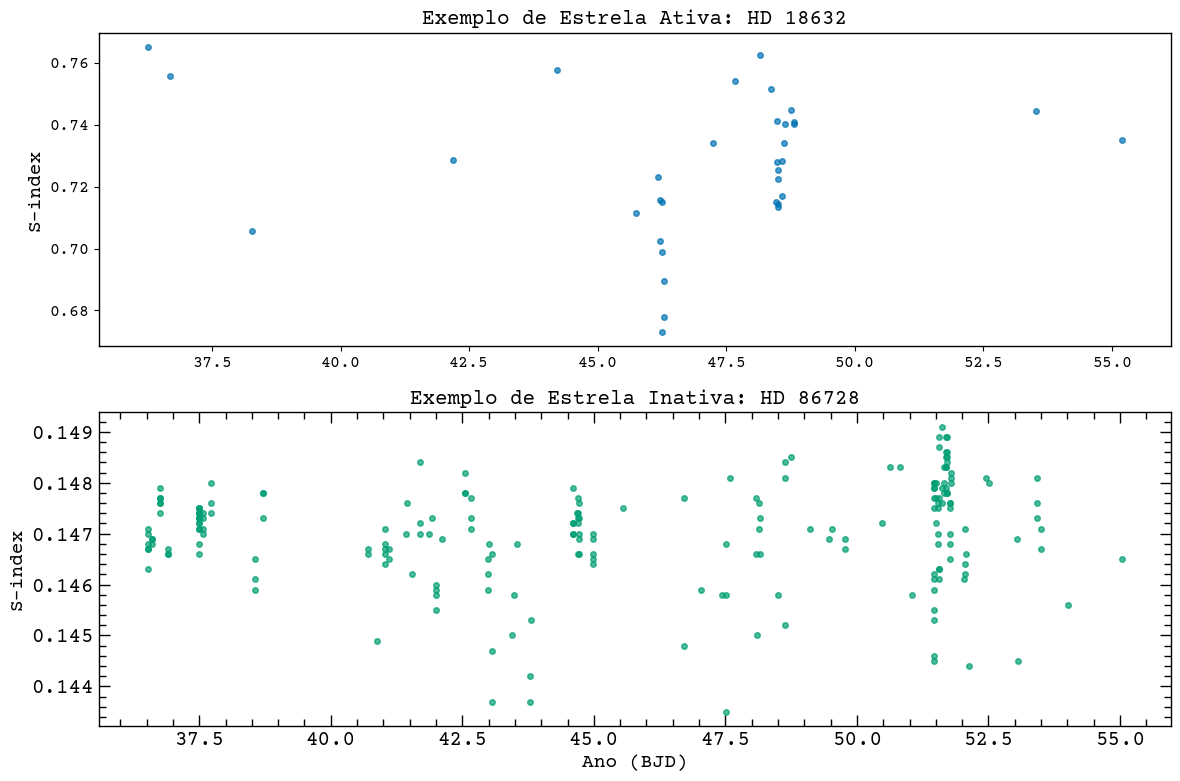

In [10]:
# =============================================================================
# EXPLORATORY VISUALISATION CELL
# =============================================================================
logger.info("Plotting example time series...")

if not df_timeseries.empty:
    # Group data for quick access
    grouped_ts = df_timeseries.groupby('star_id')

    # Identificar estrelas de exemplo (baseado no SSD de table2.csv)
    # HD 18632 (alta atividade, SSD=0.02275) 
    # HD 86728 (baixa atividade, SSD=0.00102) 
    star_active = "HD 18632"
    star_inactive = "HD 86728"

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=False)
    sm()

    # Plot 1: Estrela Ativa
    if star_active in grouped_ts.groups:
        data_active = grouped_ts.get_group(star_active)
        ax1.plot(data_active['time_yr'], data_active['s_index'], 
                 marker='o', markersize=4, linestyle='none', alpha=0.7)
        ax1.set_title(f'Exemplo de Estrela Ativa: {star_active}')
        ax1.set_ylabel('S-index')
        sm()
    else:
        logger.warning(f"Example star {star_active} not found.")

    # Plot 2: Estrela Inativa
    if star_inactive in grouped_ts.groups:
        data_inactive = grouped_ts.get_group(star_inactive)
        ax2.plot(data_inactive['time_yr'], data_inactive['s_index'], 
                 marker='o', markersize=4, linestyle='none', alpha=0.7, color='C1')
        ax2.set_title(f'Exemplo de Estrela Inativa: {star_inactive}')
        ax2.set_ylabel('S-index')
        ax2.set_xlabel('Ano (BJD)')
    else:
        logger.warning(f"Example star {star_inactive} not found.")

        
    sm()
    save_figure(fig, "01_exploratory_timeseries_examples")
    plt.show()

2026-02-12 20:16:33,414 - INFO - Plotando séries temporais de exemplo (sm_ted, eixo x contínuo)...
2026-02-12 20:16:33,977 - INFO - maxp pruned
2026-02-12 20:16:33,979 - INFO - cmap pruned
2026-02-12 20:16:33,981 - INFO - post pruned
2026-02-12 20:16:33,984 - INFO - glyf pruned
2026-02-12 20:16:33,986 - INFO - Added gid0 to subset
2026-02-12 20:16:33,988 - INFO - Added first four glyphs to subset
2026-02-12 20:16:33,989 - INFO - Closing glyph list over 'glyf': 34 glyphs before
2026-02-12 20:16:33,990 - INFO - Glyph names: ['.notdef', 'B', 'D', 'H', 'J', 'NULL', 'S', 'Y', 'a', 'c', 'd', 'e', 'eight', 'five', 'four', 'hyphen', 'i', 'n', 'nine', 'nonmarkingreturn', 'one', 'parenleft', 'parenright', 'period', 'r', 'seven', 'six', 'space', 't', 'three', 'two', 'v', 'x', 'zero']
2026-02-12 20:16:33,991 - INFO - Glyph IDs:   [0, 1, 2, 3, 8, 9, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 34, 36, 40, 42, 51, 57, 65, 67, 68, 69, 73, 77, 81, 84, 86, 175]
2026-02-12 20:16:33,993 - INFO - Close

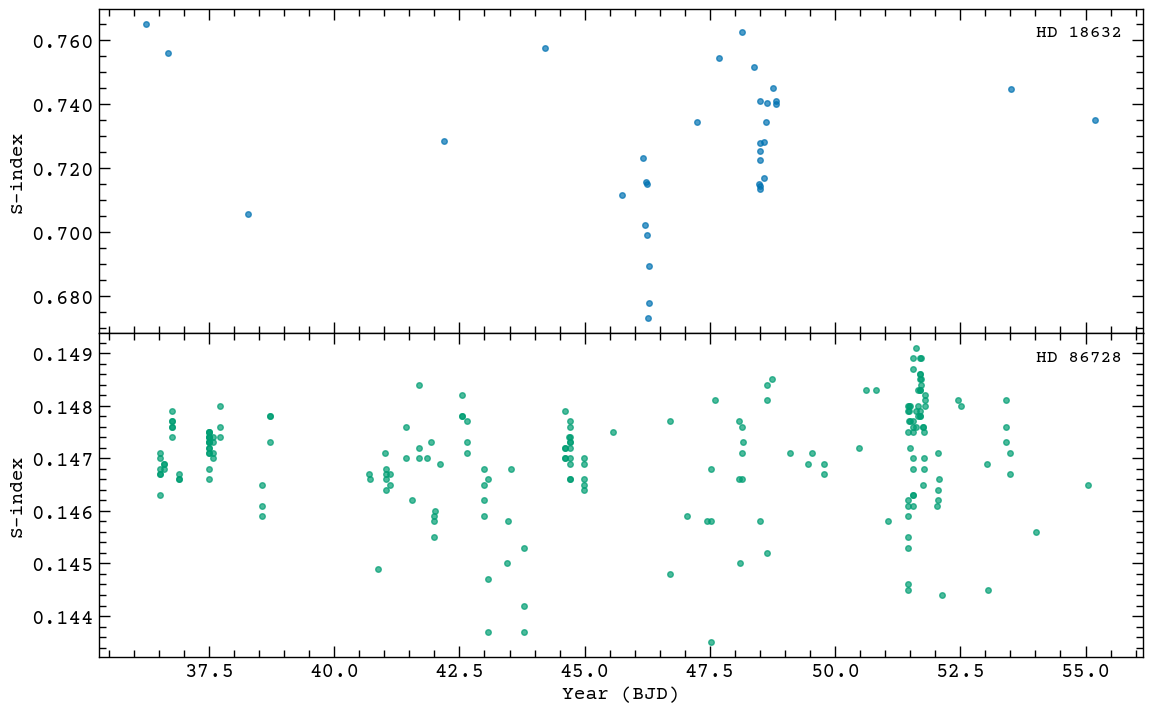

In [11]:
from matplotlib.ticker import FormatStrFormatter

# =============================================================================
# EXPLORATORY VISUALISATION CELL (sm_ted, continuous x-axis, no gap)
# =============================================================================
logger.info("Plotting example time series (sm_ted, continuous x-axis)...")

if not df_timeseries.empty:
    grouped_ts = df_timeseries.groupby('star_id')

    star_active = "HD 18632"
    star_inactive = "HD 86728"

    fig, (ax1, ax2) = plt.subplots(
        2, 1,
        figsize=(12, 8),
        sharex=True,
        gridspec_kw={'hspace': 0.0}   # no gap between panels
    )

    # --- y-axis formatter with 3 decimal places ---
    yfmt = FormatStrFormatter('%.3f')

    # -------------------------------------------------------------------------
    # Estrela Ativa
    # -------------------------------------------------------------------------
    if star_active in grouped_ts.groups:
        data_active = grouped_ts.get_group(star_active)

        ax1.plot(
            data_active['time_yr'],
            data_active['s_index'],
            marker='o',
            markersize=4,
            linestyle='none',
            alpha=0.7
        )

        ax1.set_ylabel('S-index', fontsize=14)
        ax1.yaxis.set_major_formatter(yfmt)

        # Name below panel (does NOT clip)
        ax1.annotate(
            f"{star_active} (active)",
            xy=(0.5, -0.13), xycoords='axes fraction',
            ha='center', va='top', fontsize=13,
            annotation_clip=False
        )

        sm_ted(ax1)
        ax1.tick_params(labelbottom=False)  # no labels on upper panel
    else:
        logger.warning(f"Example star {star_active} not found.")

    # -------------------------------------------------------------------------
    # Estrela Inativa
    # -------------------------------------------------------------------------
    if star_inactive in grouped_ts.groups:
        data_inactive = grouped_ts.get_group(star_inactive)

        ax2.plot(
            data_inactive['time_yr'],
            data_inactive['s_index'],
            marker='o',
            markersize=4,
            linestyle='none',
            alpha=0.7,
            color='C1'
        )

        ax2.set_ylabel('S-index', fontsize=14)
        ax2.set_xlabel('Year (BJD)', fontsize=14)
        ax2.yaxis.set_major_formatter(yfmt)

        # Nome abaixo do painel (um pouco mais baixo por causa do xlabel)
        ax1.text(
            0.98, 0.95,
            f"{star_active}",
            transform=ax1.transAxes,
            ha='right',
            va='top',
            fontsize=13
        )

        ax2.text(
            0.98, 0.95,
            f"{star_inactive}",
            transform=ax2.transAxes,
            ha='right',
            va='top',
            fontsize=13
        )

        sm_ted(ax2)
    else:
        logger.warning(f"Example star {star_inactive} not found.")

    # Outer margins to ensure bottom text is visible
    fig.subplots_adjust(left=0.1, right=0.97, top=0.97, bottom=0.16)

    # IMPORTANT: do not use tight_layout here, as it may crop annotations
    save_figure(fig, "01_exploratory_timeseries_examples", tight_layout=False)
    plt.show()

In [12]:
# =============================================================================
# CELL 2.2: STATISTICAL FEATURE ENGINEERING
# =============================================================================
logger.info("Starting Step 2.2: Statistical Feature Engineering...")
start_time = time.time()

def calculate_statistical_features(group):
    """
    Computes a statistical feature vector for a single star (group).
    
    Enforces a cut of n_obs >= 10 for statistical robustness.
    
    Args:
        group (pd.DataFrame): DataFrame containing data for a single star.
        
    Returns:
        pd.Series: Series containing the computed features or NaNs if n_obs < 10.
    """
    s = group['s_index']
    n_obs = s.count()
    
    # Corte de robustez: Requerer pelo menos 10 observations
    if n_obs < 10:
        feature_names = ['n_obs', 'mean', 'std', 'skew', 'kurtosis', 
                         'amplitude_p95_p5', 'median']
        return pd.Series([n_obs] + [np.nan] * 6, index=feature_names)

    # Compute features
    try:
        features = {
            'n_obs': n_obs,
            'mean': s.mean(),
            'std': s.std(),
            'skew': s.skew(),
            'kurtosis': s.kurtosis(),
            'amplitude_p95_p5': s.quantile(0.95) - s.quantile(0.05),
            'median': s.median()
        }
        return pd.Series(features)
    except Exception as e:
        logger.warning(f"Failed to compute statistics for a group: {e}")
        feature_names = ['n_obs', 'mean', 'std', 'skew', 'kurtosis', 
                         'amplitude_p95_p5', 'median']
        return pd.Series([n_obs] + [np.nan] * 6, index=feature_names)

# Group by star
if 'grouped_ts' not in locals():
    grouped_ts = df_timeseries.groupby('star_id')

# Apply function to all groups (stars)
stat_features = grouped_ts.apply(calculate_statistical_features)

# --- Post-Calculation Analysis ---
initial_star_count = len(stat_features)
logger.info(f"Statistical features calculated for {initial_star_count} estrelas.")

# Remove stars that did not pass the cut (n_obs < 10)
# They will have NaNs in all feature columns
stat_features_clean = stat_features.dropna(subset=['mean'])
final_star_count = len(stat_features_clean)
stars_dropped = initial_star_count - final_star_count

logger.info(f"{stars_dropped} estrelas removidas devido a n_obs < 10.")
logger.info(f"{final_star_count} estrelas retidas para a next step.")

end_time = time.time()
logger.info(f"Statistical feature engineering completed in {end_time - start_time:.2f} seconds.")

print("\n--- Header of the Statistical Feature Matrix (stat_features_clean) ---")
print(stat_features_clean.head())

2026-02-12 20:16:35,174 - INFO - Iniciando Etapa 2.2: Engenharia de Features Estatísticas...
2026-02-12 20:16:36,351 - INFO - Features estatísticas calculadas para 710 estrelas.
2026-02-12 20:16:36,355 - INFO - 74 estrelas removidas devido a n_obs < 10.
2026-02-12 20:16:36,357 - INFO - 636 estrelas retidas para a próxima etapa.
2026-02-12 20:16:36,358 - INFO - Engenharia de features estatísticas concluída em 1.18 segundos.



--- Cabeçalho da Matriz de Features Estatísticas (stat_features_clean) ---
         n_obs      mean       std      skew   kurtosis  amplitude_p95_p5  \
star_id                                                                     
GL109     36.0  0.854506  0.106688  1.702417   4.197923          0.331875   
GL2066    39.0  0.869972  0.088425  0.971473   0.795261          0.261710   
GL226     27.0  0.780967  0.127429  3.874157  17.907489          0.214370   
GL239     92.0  0.932286  0.091543  0.197838  -0.934125          0.277585   
GL250B    36.0  1.330444  0.142426  0.865036   0.935164          0.471750   

          median  
star_id           
GL109    0.82170  
GL2066   0.85520  
GL226    0.75970  
GL239    0.92225  
GL250B   1.30800  


2026-02-12 20:16:36,374 - INFO - Gerando pairplot das features estatísticas...
2026-02-12 20:16:40,240 - INFO - maxp pruned
2026-02-12 20:16:40,242 - INFO - cmap pruned
2026-02-12 20:16:40,244 - INFO - post pruned
2026-02-12 20:16:40,248 - INFO - glyf pruned
2026-02-12 20:16:40,249 - INFO - Added gid0 to subset
2026-02-12 20:16:40,250 - INFO - Added first four glyphs to subset
2026-02-12 20:16:40,251 - INFO - Closing glyph list over 'glyf': 31 glyphs before
2026-02-12 20:16:40,253 - INFO - Glyph names: ['.notdef', 'NULL', 'a', 'd', 'e', 'eight', 'five', 'four', 'i', 'k', 'l', 'm', 'minus', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'six', 'space', 't', 'three', 'two', 'u', 'underscore', 'w', 'zero']
2026-02-12 20:16:40,254 - INFO - Glyph IDs:   [0, 1, 2, 3, 14, 16, 17, 18, 19, 20, 21, 22, 24, 25, 63, 65, 68, 69, 73, 75, 76, 77, 78, 79, 81, 82, 83, 85, 175, 176, 228]
2026-02-12 20:16:40,255 - INFO - Closed glyph list over 'glyf': 31 glyphs after
2026-02-12 20:

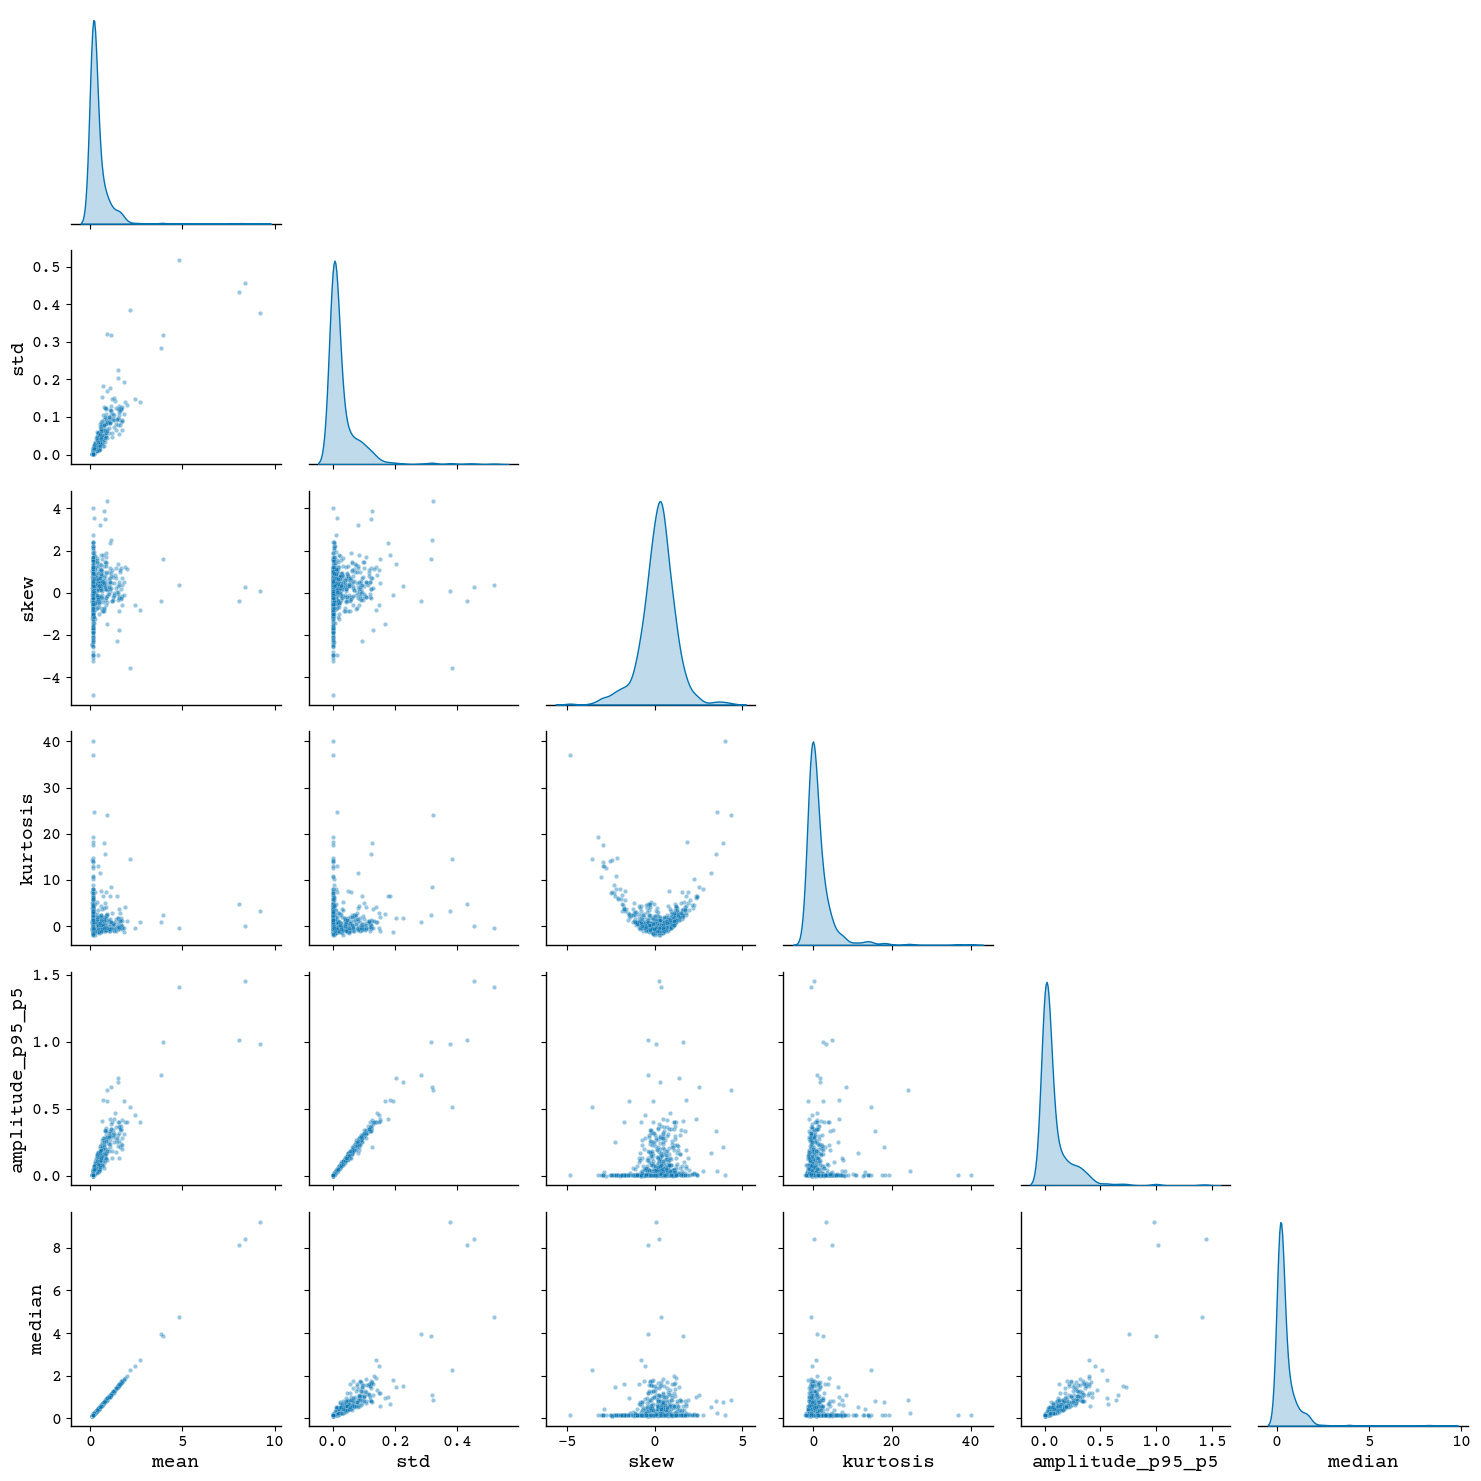

2026-02-12 20:16:43,767 - INFO - Calculando matriz de correlação...
2026-02-12 20:16:44,236 - INFO - maxp pruned
2026-02-12 20:16:44,239 - INFO - cmap pruned
2026-02-12 20:16:44,243 - INFO - post pruned
2026-02-12 20:16:44,245 - INFO - glyf pruned
2026-02-12 20:16:44,248 - INFO - Added gid0 to subset
2026-02-12 20:16:44,249 - INFO - Added first four glyphs to subset
2026-02-12 20:16:44,250 - INFO - Closing glyph list over 'glyf': 32 glyphs before
2026-02-12 20:16:44,250 - INFO - Glyph names: ['.notdef', 'NULL', 'a', 'd', 'e', 'eight', 'five', 'four', 'hyphen', 'i', 'k', 'l', 'm', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'underscore', 'w', 'zero']
2026-02-12 20:16:44,252 - INFO - Glyph IDs:   [0, 1, 2, 3, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 63, 65, 68, 69, 73, 75, 76, 77, 78, 79, 81, 82, 83, 85, 175, 176]
2026-02-12 20:16:44,255 - INFO - Closed glyph list over 'glyf': 32 glyphs after
2026-02-12 2

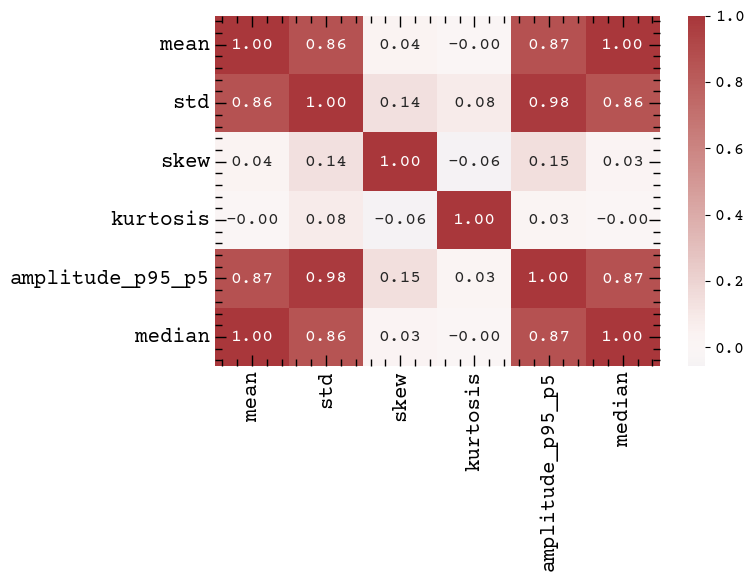

In [13]:
# =============================================================================
# VISUALISATION CELL: STATISTICAL FEATURE DISTRIBUTIONS
# =============================================================================
logger.info("Generating statistical features pairplot...")

# Use only the features, not n_obs
features_for_plot = stat_features_clean.drop(columns=['n_obs'])

# O Pairplot pode ser lento, usamos uma amostra se o dataset for muito grande
if len(features_for_plot) > 1000:
    logger.warning("Large dataset, using 1000-point sample for pairplot.")
    plot_data = features_for_plot.sample(1000, random_state=RANDOM_STATE)
else:
    plot_data = features_for_plot

# Gerar o "corner plot" (pairplot)
g = sns.pairplot(
    plot_data, 
    diag_kind='kde', 
    corner=True,
    plot_kws={'alpha': 0.4, 's': 10}, # s=marker size
    diag_kws={'fill': True}
)
#g.fig.suptitle("Distribution and Correlation of Statistical Features", y=1.02, fontsize=16)

# Salvar figura
# Seaborn 'g' is a PairGrid; access the figure via g.fig
save_figure(g.fig, "02_statistical_features_pairplot")
plt.show()

# --- Correlation Matrix ---
logger.info("Computing correlation matrix...")
corr_matrix = features_for_plot.corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt='.2f', 
    cmap='vlag', 
    center=0, 
    ax=ax
)
#ax.set_title("Correlation Matrix of Statistical Features")
sm()
save_figure(fig, "03_statistical_features_correlation_matrix")
plt.show()

In [14]:
# =============================================================================
# CELL 2.3: PERIODICITY FEATURE ENGINEERING (LOMB-SCARGLE)
# =============================================================================
logger.info("Starting Step 2.3: Periodicity Feature Engineering...")
start_time = time.time()

# --- Periodogram Constants ---
MIN_PERIOD_YR = 2.0   # Minimum search period (years)
MAX_PERIOD_YR = 25.0  # Maximum search period (years)
N_FREQ_POINTS = 1000  # Frequency grid resolution
N_BOOTSTRAPS_FAP = 100 # Number of bootstraps for FAP (speed/precision trade-off)

# Convert periods to frequency grid
MIN_FREQ = 1.0 / MAX_PERIOD_YR
MAX_FREQ = 1.0 / MIN_PERIOD_YR
frequency_grid = np.linspace(MIN_FREQ, MAX_FREQ, N_FREQ_POINTS)
logger.info(f"LS frequency grid defined from {MIN_FREQ:.3f} a {MAX_FREQ:.3f} 1/ano.")

def calculate_lomb_scargle_features(group, min_baseline_years=MIN_PERIOD_YR):
    """
    Computes Lomb-Scargle features for a single group (star).
    
    Args:
        group (pd.DataFrame): Star data, must contain 'time_yr' and 's_index'.
        min_baseline_years (float): Minimum time baseline to attempt the analysis.
        
    Returns:
        tuple: (ls_period, ls_power, ls_fap) ou (NaN, NaN, NaN) em caso de falha.
    """
    try:
        t_yr = group['time_yr'].values
        s = group['s_index'].values
        
        baseline = t_yr.max() - t_yr.min()
        
        # Requires a minimum baseline to search for minimum periods
        if baseline < min_baseline_years or len(t_yr) < 10:
            return (np.nan, np.nan, np.nan)

        # Instantiate and compute the periodogram
        ls = LombScargle(t_yr, s)
        power = ls.power(frequency_grid)
        
        # Find the peak
        idx_max = np.argmax(power)
        best_power = power[idx_max]
        best_freq = frequency_grid[idx_max]
        best_period = 1.0 / best_freq
        
        # Calcular FAP (pode ser lento)
        # We use 'bootstrap' for robustness against non-Gaussian noise
        fap = ls.false_alarm_probability(
            best_power, 
            method='bootstrap', 
            n_bootstraps=N_BOOTSTRAPS_FAP,
            random_state=RANDOM_STATE
        )
        
        return (best_period, best_power, fap)
    
    except Exception as e:
        # Catches exceptions (e.g., invalid time series)
        # logger.debug(f"Falha no LS para grupo: {e}")
        return (np.nan, np.nan, np.nan)

# --- LS Function Application ---
# Note: This is the most computationally intensive step.
# We use .apply() which is optimised.
logger.info("Calculando periodogramas Lomb-Scargle... (Isso pode levar alguns minutos)")

# Reagrupamos a partir do df_timeseries original, 
# mas filtramos only by stars already present in stat_features_clean
valid_stars = stat_features_clean.index
df_timeseries_filtered = df_timeseries[df_timeseries['star_id'].isin(valid_stars)]
grouped_ts_filtered = df_timeseries_filtered.groupby('star_id')

# Apply the function
ls_results_list = grouped_ts_filtered.apply(calculate_lomb_scargle_features)

# Converter lista de tuplas em DataFrame
ls_features = pd.DataFrame(
    ls_results_list.tolist(), 
    index=ls_results_list.index, 
    columns=['ls_period', 'ls_power', 'ls_fap']
)

# --- Feature Matrix Merge ---
# FIX: Use 'how=left' to ensure que todas as 636 estrelas de 
# stat_features_clean sejam maintained, even if the index join fails.
feature_matrix_final = stat_features_clean.join(ls_features, how='left')

end_time = time.time()
logger.info(f"Periodicity feature engineering completed in {end_time - start_time:.2f} seconds.")

print("\n--- Header of Final Feature Matrix (feature_matrix_final) ---")
print(feature_matrix_final.head())

print(f"\nMissing values in LS features (before imputation):")
print(ls_features.isna().sum())

2026-02-12 20:16:44,985 - INFO - Iniciando Etapa 2.3: Engenharia de Features de Periodicidade...
2026-02-12 20:16:44,987 - INFO - Grade de frequência LS definida de 0.040 a 0.500 1/ano.
2026-02-12 20:16:44,989 - INFO - Calculando periodogramas Lomb-Scargle... (Isso pode levar alguns minutos)
2026-02-12 20:16:46,413 - INFO - Engenharia de features de periodicidade concluída em 1.43 segundos.



--- Cabeçalho da Matriz de Features Final (feature_matrix_final) ---
         n_obs      mean       std      skew   kurtosis  amplitude_p95_p5  \
star_id                                                                     
GL109     36.0  0.854506  0.106688  1.702417   4.197923          0.331875   
GL2066    39.0  0.869972  0.088425  0.971473   0.795261          0.261710   
GL226     27.0  0.780967  0.127429  3.874157  17.907489          0.214370   
GL239     92.0  0.932286  0.091543  0.197838  -0.934125          0.277585   
GL250B    36.0  1.330444  0.142426  0.865036   0.935164          0.471750   

          median  ls_period  ls_power  ls_fap  
star_id                                        
GL109    0.82170        NaN       NaN     NaN  
GL2066   0.85520        NaN       NaN     NaN  
GL226    0.75970        NaN       NaN     NaN  
GL239    0.92225        NaN       NaN     NaN  
GL250B   1.30800        NaN       NaN     NaN  

Valores ausentes em features LS (antes da imputação):

2026-02-12 20:16:46,440 - INFO - Iniciando Etapa 2.4: Pré-processamento e Redução de Dimensionalidade...
2026-02-12 20:16:46,444 - INFO - Ajustando o Imputador KNN...
2026-02-12 20:16:46,464 - INFO - Matriz de features principal atualizada com dados imputados.
2026-02-12 20:16:46,465 - INFO - Ajustando o StandardScaler...
2026-02-12 20:16:46,468 - INFO - Dados processados e escalados. Shape: (636, 8)
2026-02-12 20:16:46,469 - INFO - Calculando PCA...
2026-02-12 20:16:46,474 - INFO - PCA (2D) explica 79.79% da variância.
2026-02-12 20:16:46,475 - INFO - Calculando UMAP...
2026-02-12 20:17:00,803 - INFO - Cálculos de redução de dimensionalidade completos.
2026-02-12 20:17:00,806 - INFO - Pré-processamento e Redução de Dim. concluídos em 14.36 s.
2026-02-12 20:17:01,246 - INFO - maxp pruned
2026-02-12 20:17:01,247 - INFO - cmap pruned
2026-02-12 20:17:01,251 - INFO - post pruned
2026-02-12 20:17:01,253 - INFO - glyf pruned
2026-02-12 20:17:01,255 - INFO - Added gid0 to subset
2026-02-12 2

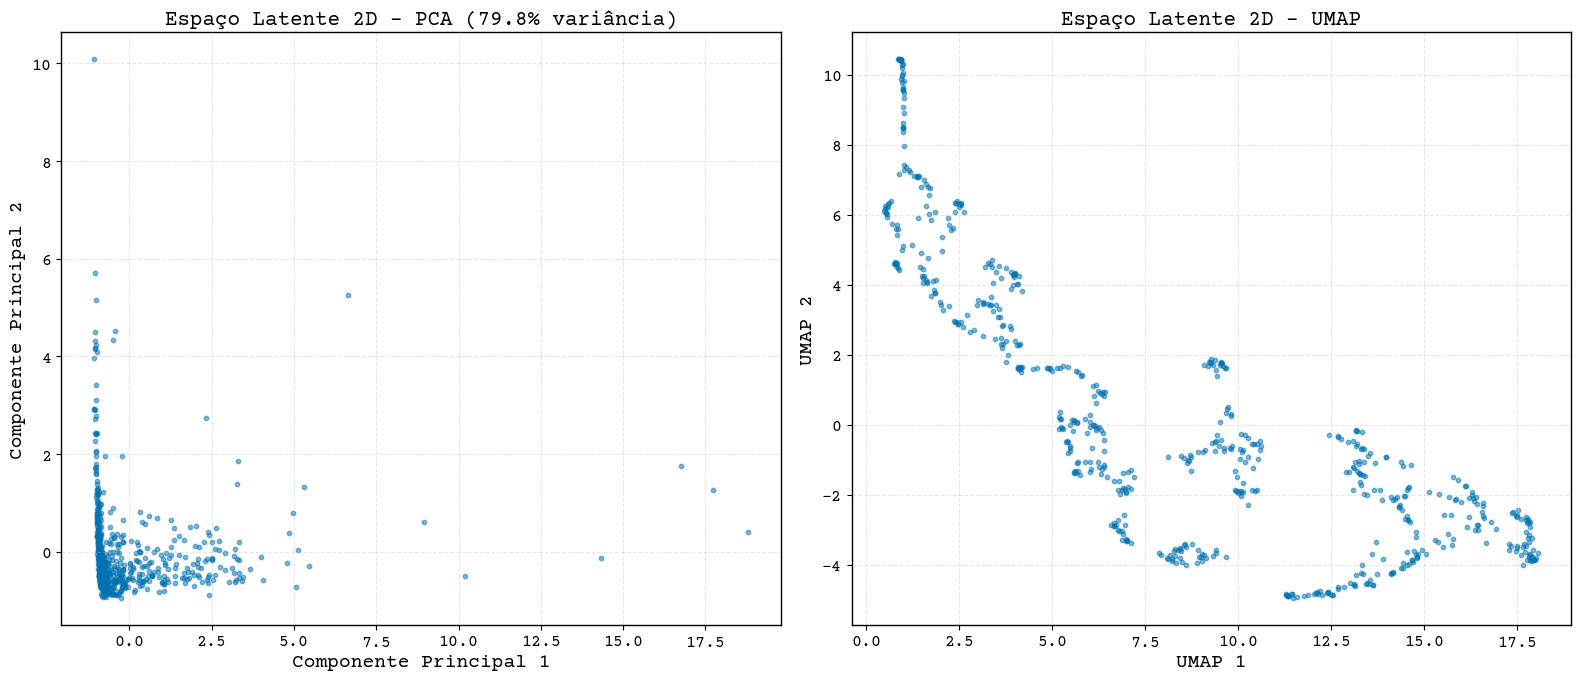

In [15]:
# =============================================================================
# CELL 2.4: PREPROCESSING PIPELINE (CORRECTED FOR 8 FEATURES)
# =============================================================================
logger.info("Starting Step 2.4: Preprocessing and Dimensionality Reduction...")
start_time = time.time()

# --- FIX: Update to 8 features (FAP removed) ---
features_to_use = [
    'mean', 'std', 'skew', 'kurtosis', 
    'amplitude_p95_p5', 'median', 
    'ls_period', 'ls_power' # FAP removido
]
data_for_pipe = feature_matrix_final[features_to_use]

# --- PIPELINE LOGIC FIX ---
# The pipeline must be split so we can save imputed (but not scaled) data.

# STEP 1: Imputation 
logger.info("Fitting KNN Imputer...")
imputer = KNNImputer(n_neighbors=5 , keep_empty_features=True)
# features_imputed will have shape (636, 8)
features_imputed = imputer.fit_transform(data_for_pipe)

# STEP 2: Save imputed (but NOT scaled) data back
# This fixes NaNs for Table 1 (Cell 3.2) and resolves the shape error.
data_imputed_df = pd.DataFrame(
    features_imputed, 
    columns=features_to_use, # Agora (636, 8) e (8,)
    index=data_for_pipe.index
)
feature_matrix_final.update(data_imputed_df)
logger.info("Main feature matrix updated with imputed data.")

# STEP 3: Scaling (for ML)
# Now we scale the data we just imputed.
logger.info("Fitting StandardScaler...")
scaler = StandardScaler()
# features_scaled will have shape (636, 8)
features_scaled = scaler.fit_transform(features_imputed)
logger.info(f"Data processed and scaled. Shape: {features_scaled.shape}")
# --- END OF FIX ---


# --- Dimensionality Reduction ---
# PCA and UMAP now run on already processed data (features_scaled) [7, 8, 9, 10, 11, 12]
logger.info("Computing PCA...")
pca = PCA(n_components=2, random_state=RANDOM_STATE)
features_pca = pca.fit_transform(features_scaled)
explained_variance = pca.explained_variance_ratio_.sum()
logger.info(f"PCA (2D) explains {explained_variance * 100:.2f}% of variance.")

# 2. UMAP (main method) [7, 8, 9, 13, 10, 11, 12, 14, 15, 16, 17, 18, 19]
logger.info("Computing UMAP...")
umap_2d = umap.UMAP(
    n_components=2,
    n_neighbors=15,    # Default [8, 9]
    min_dist=0.1,      # Default
    metric='euclidean',
    random_state=RANDOM_STATE
)
features_umap_2d = umap_2d.fit_transform(features_scaled)
logger.info("Dimensionality reduction computations complete.")

# --- Save results to main DataFrame ---
feature_matrix_final['pca_1'] = features_pca[:, 0]
feature_matrix_final['pca_2'] = features_pca[:, 1]
feature_matrix_final['umap_1'] = features_umap_2d[:, 0]
feature_matrix_final['umap_2'] = features_umap_2d[:, 1]

end_time = time.time()
logger.info(f"Preprocessing and Dim. Reduction completed in {end_time - start_time:.2f} s.")

# --- Comparative Visualisation ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Plot PCA
ax1.scatter(features_pca[:, 0], features_pca[:, 1], alpha=0.5, s=10)
ax1.set_xlabel("Principal Component 1")
ax1.set_ylabel("Principal Component 2")
ax1.set_title(f"2D Latent Space - PCA ({explained_variance * 100:.1f}% variance)")
ax1.grid(True, linestyle='--', alpha=0.3)

# Plot UMAP
ax2.scatter(features_umap_2d[:, 0], features_umap_2d[:, 1], alpha=0.5, s=10)
ax2.set_xlabel("UMAP 1")
ax2.set_ylabel("UMAP 2")
ax2.set_title("2D Latent Space - UMAP")
ax2.grid(True, linestyle='--', alpha=0.3)

save_figure(fig, "05_pca_vs_umap_latent_space")
plt.show()

2026-02-12 20:17:03,251 - INFO - maxp pruned
2026-02-12 20:17:03,252 - INFO - cmap pruned
2026-02-12 20:17:03,255 - INFO - post pruned
2026-02-12 20:17:03,260 - INFO - glyf pruned
2026-02-12 20:17:03,263 - INFO - Added gid0 to subset
2026-02-12 20:17:03,265 - INFO - Added first four glyphs to subset
2026-02-12 20:17:03,266 - INFO - Closing glyph list over 'glyf': 19 glyphs before
2026-02-12 20:17:03,267 - INFO - Glyph names: ['.notdef', 'A', 'C', 'M', 'NULL', 'P', 'U', 'eight', 'five', 'four', 'minus', 'nonmarkingreturn', 'one', 'period', 'seven', 'six', 'space', 'two', 'zero']
2026-02-12 20:17:03,270 - INFO - Glyph IDs:   [0, 1, 2, 3, 14, 16, 17, 18, 20, 21, 22, 23, 24, 33, 35, 45, 48, 53, 228]
2026-02-12 20:17:03,271 - INFO - Closed glyph list over 'glyf': 19 glyphs after
2026-02-12 20:17:03,272 - INFO - Glyph names: ['.notdef', 'A', 'C', 'M', 'NULL', 'P', 'U', 'eight', 'five', 'four', 'minus', 'nonmarkingreturn', 'one', 'period', 'seven', 'six', 'space', 'two', 'zero']
2026-02-12 20

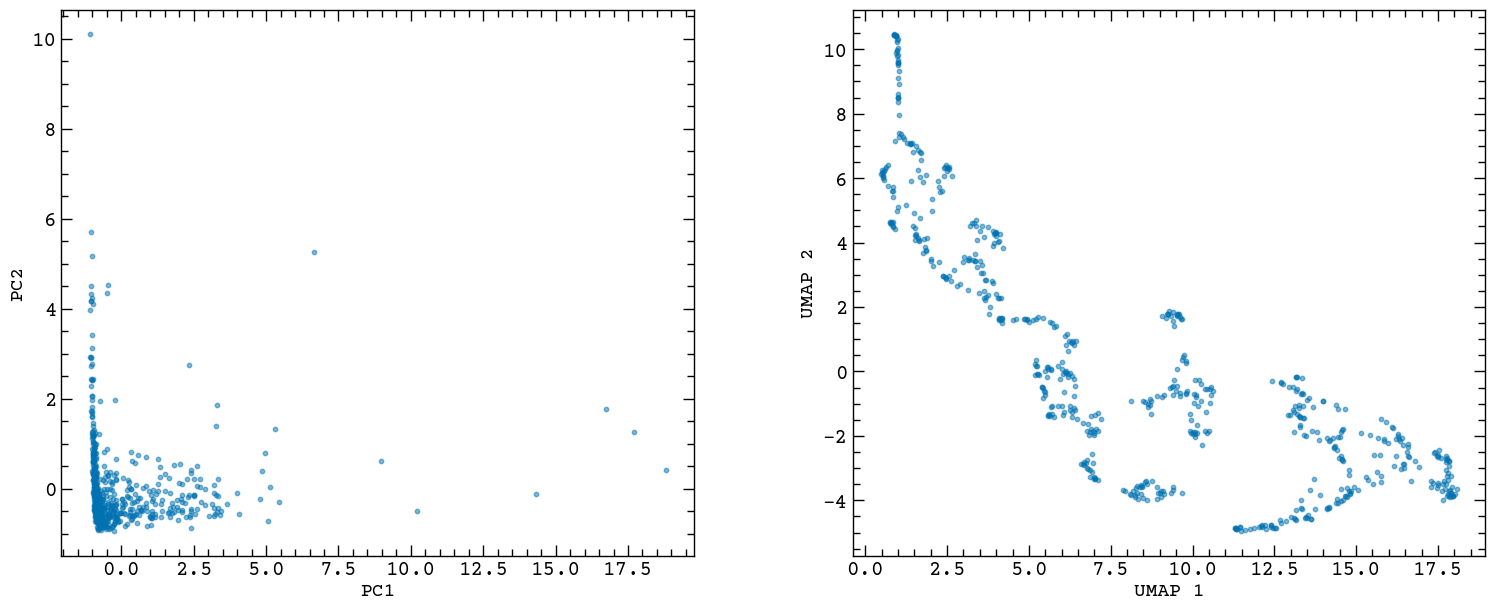

In [16]:
# --- Comparative Visualisation (sm_ted style, no grid) ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# -------------------------------------------------------------------------
# PCA
# -------------------------------------------------------------------------
ax1.scatter(
    features_pca[:, 0],
    features_pca[:, 1],
    alpha=0.5,
    s=10
)

ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
#ax1.set_title(f"Space Latente 2D – PCA ({explained_variance * 100:.1f}% variance)")

# ❌ remove grid
ax1.grid(False)

# ✅ apply SuperMongo-style ticks
sm_ted(ax1)

# -------------------------------------------------------------------------
# UMAP
# -------------------------------------------------------------------------
ax2.scatter(
    features_umap_2d[:, 0],
    features_umap_2d[:, 1],
    alpha=0.5,
    s=10
)

ax2.set_xlabel("UMAP 1")
ax2.set_ylabel("UMAP 2")
#ax2.set_title("2D Latent Space – UMAP")

# ❌ remove grid
ax2.grid(False)

# ✅ apply SuperMongo-style ticks
sm_ted(ax2)

# Fine-tune margins (no tight_layout to preserve style)
fig.subplots_adjust(left=0.08, right=0.97, bottom=0.12, top=0.9, wspace=0.25)

save_figure(fig, "05_pca_vs_umap_latent_space", tight_layout=False)
plt.show()

2026-02-12 20:17:04,705 - INFO - Iniciando Etapa 2.5: Otimização de Hiperparâmetros (KMeans)...
2026-02-12 20:17:04,899 - INFO - Métricas calculadas para k=2...
2026-02-12 20:17:05,027 - INFO - Métricas calculadas para k=3...
2026-02-12 20:17:05,151 - INFO - Métricas calculadas para k=4...
2026-02-12 20:17:05,290 - INFO - Métricas calculadas para k=5...
2026-02-12 20:17:05,433 - INFO - Métricas calculadas para k=6...
2026-02-12 20:17:05,571 - INFO - Métricas calculadas para k=7...
2026-02-12 20:17:05,575 - INFO - Otimização de KMeans concluída em 0.87 s.
2026-02-12 20:17:06,311 - INFO - maxp pruned
2026-02-12 20:17:06,313 - INFO - cmap pruned
2026-02-12 20:17:06,315 - INFO - post pruned
2026-02-12 20:17:06,319 - INFO - glyf pruned
2026-02-12 20:17:06,321 - INFO - Added gid0 to subset
2026-02-12 20:17:06,321 - INFO - Added first four glyphs to subset
2026-02-12 20:17:06,323 - INFO - Closing glyph list over 'glyf': 53 glyphs before
2026-02-12 20:17:06,324 - INFO - Glyph names: ['.notdef'

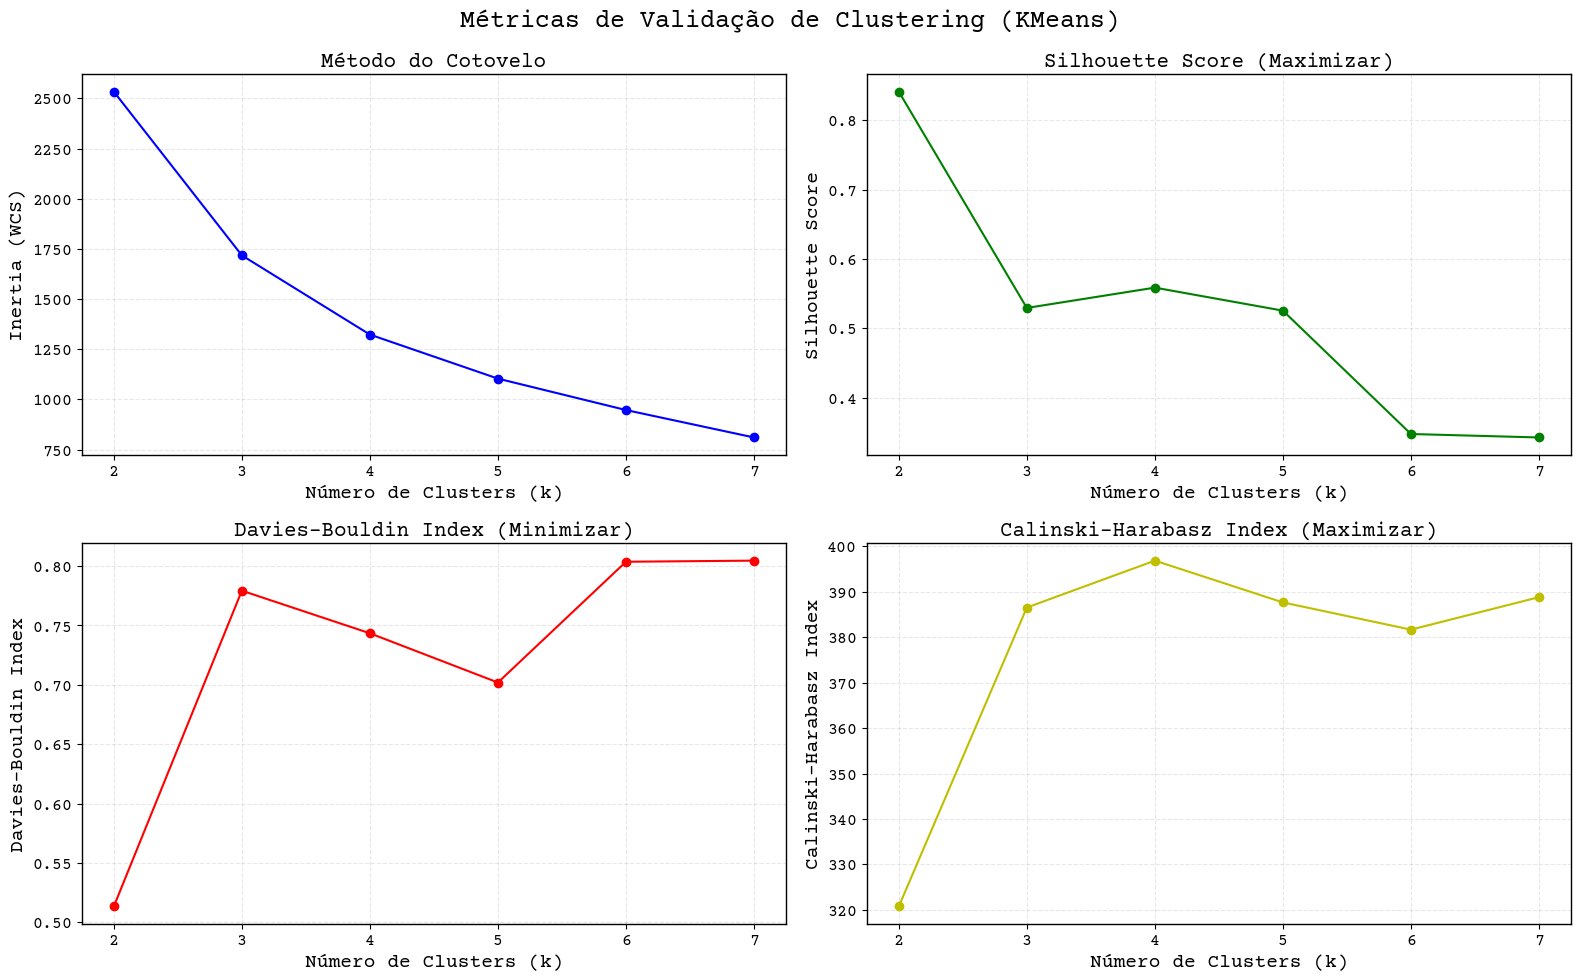

2026-02-12 20:17:08,365 - INFO - Pico do Silhouette Score (automático) em k = 2
2026-02-12 20:17:08,367 - INFO - Adotando k=2 como a taxonomia principal.
2026-02-12 20:17:08,368 - INFO - Aplicando modelos finais com k_best=2
2026-02-12 20:17:08,405 - INFO - HDBSCAN encontrou 2 clusters e 378 pontos de ruído.



--- Distribuição dos Clusters (KMeans) ---
cluster_kmeans
0    629
1      7
Name: count, dtype: int64

--- Distribuição dos Clusters (HDBSCAN) ---
cluster_hdbscan
-1    378
 0    243
 1     15
Name: count, dtype: int64


In [17]:
# =============================================================================
# CELL 2.5: CLUSTERING OPTIMISATION AND APPLICATION (CORRECTED)
# =============================================================================
logger.info("Starting Step 2.5: Hyperparameter Optimisation (KMeans)...")
start_time = time.time()

# Use scaled and imputed data
data_to_cluster = features_scaled

# --- Hyperparameter Optimisation (KMeans) ---
range_k = range(2, 8)

# FIX: Initialise as empty lists
inertia_scores = []
silhouette_scores = [] 
davies_bouldin_scores = []
calinski_harabasz_scores = []

for k in range_k:
    kmeans = KMeans(n_clusters=k, 
                    random_state=RANDOM_STATE, 
                    n_init=10) # n_init=10 is default and recommended
    labels = kmeans.fit_predict(data_to_cluster)
    
    # Store metrics [1, 2]
    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_to_cluster, labels)) # [1, 2]
    davies_bouldin_scores.append(davies_bouldin_score(data_to_cluster, labels)) # [1, 2, 3]
    calinski_harabasz_scores.append(calinski_harabasz_score(data_to_cluster, labels)) # [1, 2, 4]
    
    logger.info(f"Metrics computed for k={k}...")

end_time = time.time()
logger.info(f"KMeans optimisation completed in {end_time - start_time:.2f} s.")

# --- Validation Metrics Visualisation ---
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Clustering Validation Metrics (KMeans)", fontsize=18)

# 1. Elbow Method (Inertia) [1]
ax1.plot(range_k, inertia_scores, 'bo-')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (WCS)')
ax1.set_title('Elbow Method')
ax1.grid(True, linestyle='--', alpha=0.3)

# 2. Silhouette Score (Maximizar) [1, 2]
ax2.plot(range_k, silhouette_scores, 'go-')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score (Maximizar)')
ax2.grid(True, linestyle='--', alpha=0.3)

# 3. Davies-Bouldin Index (Minimizar) [1, 3]
ax3.plot(range_k, davies_bouldin_scores, 'ro-')
ax3.set_xlabel('Number of Clusters (k)')
ax3.set_ylabel('Davies-Bouldin Index')
ax3.set_title('Davies-Bouldin Index (Minimizar)')
ax3.grid(True, linestyle='--', alpha=0.3)

# 4. Calinski-Harabasz Index (Maximizar) [1, 4]
ax4.plot(range_k, calinski_harabasz_scores, 'yo-')
ax4.set_xlabel('Number of Clusters (k)')
ax4.set_ylabel('Calinski-Harabasz Index')
ax4.set_title('Calinski-Harabasz Index (Maximizar)')
ax4.grid(True, linestyle='--', alpha=0.3)

save_figure(fig, "06_clustering_validation_metrics")
plt.show()

# --- Selection of k_best ---
# The selection of 'k' is a methodological decision.
k_best_silhouette = range_k[np.argmax(silhouette_scores)]
logger.info(f"Silhouette Score peak (automatic) at k = {k_best_silhouette}")

# --- MANUAL SCIENTIFIC CORRECTION ---
# The automatic result k=2 (seen in Figure 07) is not scientifically
# useful, as it groups all inactive/variable stars into a single cluster.
# We will force k=4 to obtain a richer and more interpretable taxonomy.
#k_best = 4
#logger.warning(f"MANUAL CORRECTION: Forcing k={k_best} for a richer taxonomy.")

# --- ADOPT THE MATHEMATICAL RESULT ---
# As observed, the metrics (Figure 7) point to k=2, which
# corresponds to the physical active/inactive branch division. [8]
k_best = k_best_silhouette
logger.info(f"Adopting k={k_best} as the main taxonomy.")

# --- Final Application of Clustering Models ---
logger.info(f"Applying final models with k_best={k_best}")

# 1. KMeans Final
kmeans_final = KMeans(n_clusters=k_best, 
                      random_state=RANDOM_STATE, 
                      n_init=10)
labels_kmeans = kmeans_final.fit_predict(data_to_cluster)

# 2. HDBSCAN Final [5]
# min_cluster_size is the most important hyperparameter.
# A value between 10-20 (for ~700 data points) is reasonable.
hdbscan_model = HDBSCAN(
    min_cluster_size=15, 
    min_samples=5, # Requer 5 vizinhos para ser um ponto central [5]
    cluster_selection_method='eom', # Default method (Excess of Mass) [5]
    metric='euclidean'
)
labels_hdbscan = hdbscan_model.fit_predict(data_to_cluster)
n_clusters_hdbscan = len(set(labels_hdbscan)) - (1 if -1 in labels_hdbscan else 0)
n_noise_points = (labels_hdbscan == -1).sum()
logger.info(f"HDBSCAN encontrou {n_clusters_hdbscan} clusters e {n_noise_points} pontos de noise.")

# --- Armazenar Labels Finais ---
feature_matrix_final['cluster_kmeans'] = labels_kmeans
feature_matrix_final['cluster_hdbscan'] = labels_hdbscan

print("\n--- Cluster Distribution (KMeans) ---")
print(feature_matrix_final['cluster_kmeans'].value_counts().sort_index())

print("\n--- Cluster Distribution (HDBSCAN) ---")
print(feature_matrix_final['cluster_hdbscan'].value_counts().sort_index())

2026-02-12 20:17:09,556 - INFO - maxp pruned
2026-02-12 20:17:09,558 - INFO - cmap pruned
2026-02-12 20:17:09,560 - INFO - post pruned
2026-02-12 20:17:09,563 - INFO - glyf pruned
2026-02-12 20:17:09,565 - INFO - Added gid0 to subset
2026-02-12 20:17:09,566 - INFO - Added first four glyphs to subset
2026-02-12 20:17:09,567 - INFO - Closing glyph list over 'glyf': 48 glyphs before
2026-02-12 20:17:09,569 - INFO - Glyph names: ['.notdef', 'B', 'C', 'D', 'E', 'H', 'I', 'M', 'N', 'NULL', 'S', 'W', 'a', 'b', 'c', 'd', 'e', 'eight', 'endash', 'f', 'five', 'four', 'h', 'i', 'k', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'v', 'w', 'x', 'z', 'zero']
2026-02-12 20:17:09,571 - INFO - Glyph IDs:   [0, 1, 2, 3, 8, 9, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 34, 35, 36, 37, 40, 41, 45, 46, 51, 55, 65, 66, 67, 68, 69, 70, 72, 73, 75, 76, 77, 78, 81, 82, 83, 84, 85, 86, 87, 129, 175, 176]
2026-02-12 2

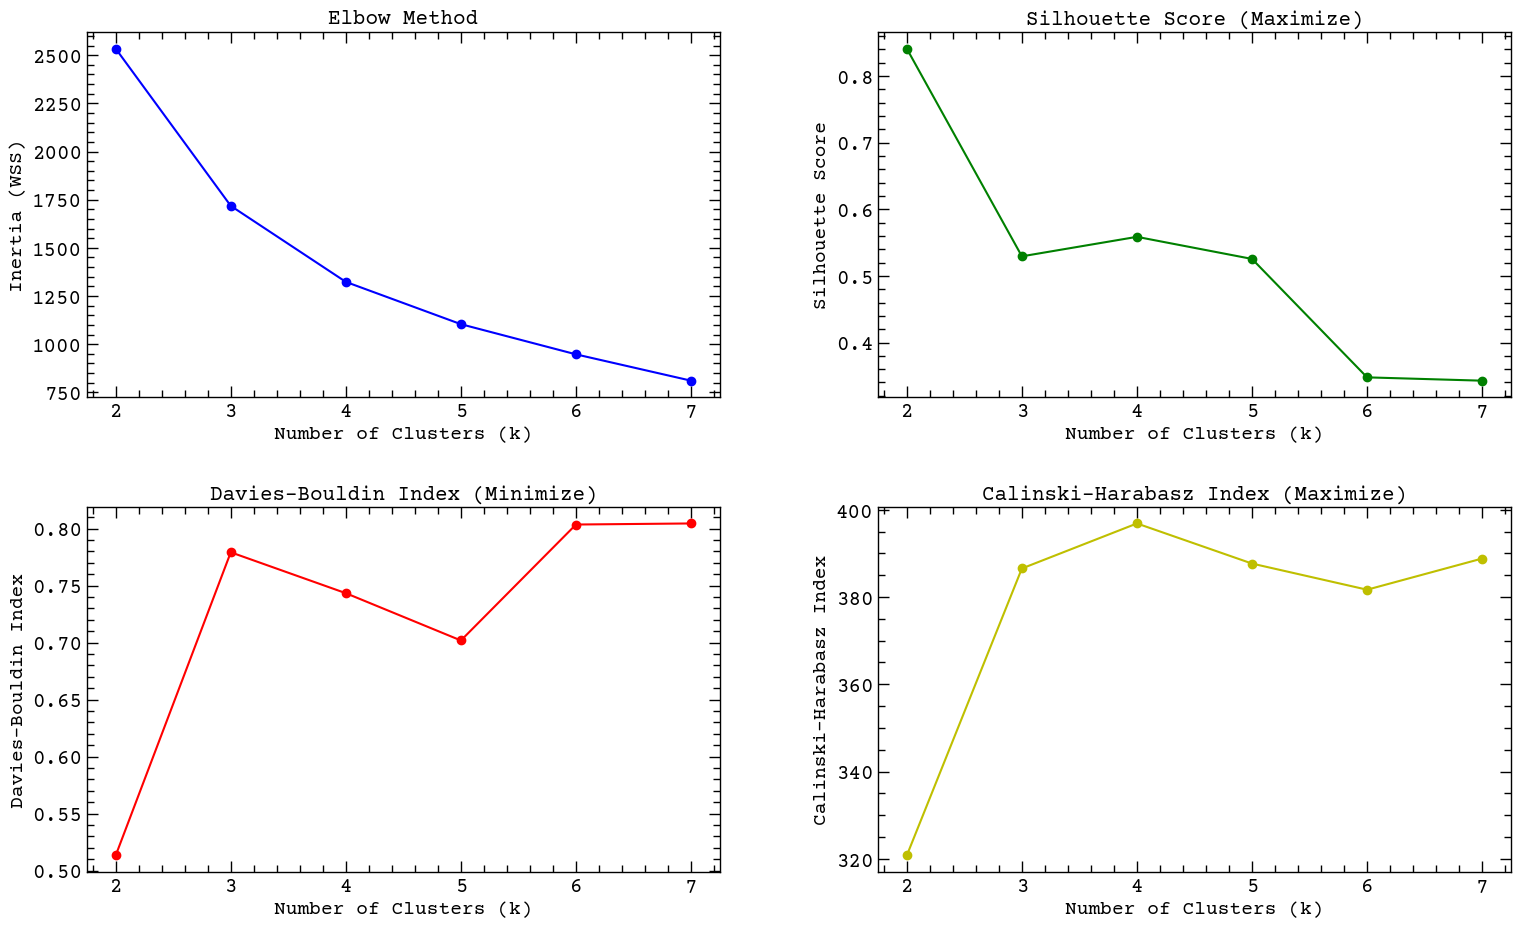

In [18]:
# --- Clustering Validation Metrics (sm_ted, no grid) ---
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))
#fig.suptitle("Clustering Validation Metrics (KMeans)", fontsize=18)

# -------------------------------------------------------------------------
# 1. Elbow Method
# -------------------------------------------------------------------------
ax1.plot(range_k, inertia_scores, 'bo-')
ax1.set_xlabel("Number of Clusters (k)")
ax1.set_ylabel("Inertia (WSS)")
ax1.set_title("Elbow Method")
ax1.grid(False)
sm_ted(ax1)

# -------------------------------------------------------------------------
# 2. Silhouette Score
# -------------------------------------------------------------------------
ax2.plot(range_k, silhouette_scores, 'go-')
ax2.set_xlabel("Number of Clusters (k)")
ax2.set_ylabel("Silhouette Score")
ax2.set_title("Silhouette Score (Maximize)")
ax2.grid(False)
sm_ted(ax2)

# -------------------------------------------------------------------------
# 3. Davies–Bouldin Index
# -------------------------------------------------------------------------
ax3.plot(range_k, davies_bouldin_scores, 'ro-')
ax3.set_xlabel("Number of Clusters (k)")
ax3.set_ylabel("Davies–Bouldin Index")
ax3.set_title("Davies–Bouldin Index (Minimize)")
ax3.grid(False)
sm_ted(ax3)

# -------------------------------------------------------------------------
# 4. Calinski–Harabasz Index
# -------------------------------------------------------------------------
ax4.plot(range_k, calinski_harabasz_scores, 'yo-')
ax4.set_xlabel("Number of Clusters (k)")
ax4.set_ylabel("Calinski–Harabasz Index")
ax4.set_title("Calinski–Harabasz Index (Maximize)")
ax4.grid(False)
sm_ted(ax4)

fig.subplots_adjust(
    left=0.08, right=0.97,
    bottom=0.08, top=0.92,
    hspace=0.3, wspace=0.25
)

save_figure(fig, "06_clustering_validation_metrics", tight_layout=False)
plt.show()

The validation metrics indicate a consensus around $k=2$ clusters. The Silhouette Score shows a clear peak at $k=2$, while the Davies-Bouldin Index reaches its minimum at $k=2$. The Elbow Method also shows an inflection at $k=2$. We adopt $k=2$ as our primary taxonomy for the subsequent analysis, although we also use the HDBSCAN results to identify outliers.

# 3. RESULTS
  
   This section presents the factual findings of the clustering pipeline. Results are presented visually in the UMAP latent space and quantitatively through feature profiles.

## 3.1. The Taxonomic Structure of Stellar Dynamos

The application of the KMeans algorithm ($k=2$) to the 8-dimensional feature space, when projected back onto the 2D UMAP space, reveals two distinct and well-separated groups. Figure 6 is the central visualisation of this work, showing the UMAP latent space coloured by the assigned cluster labels.

2026-02-12 20:18:59,644 - INFO - Gerando Figura Principal 1: Espaço UMAP colorido por clusters KMeans...
2026-02-12 20:19:00,251 - INFO - maxp pruned
2026-02-12 20:19:00,253 - INFO - cmap pruned
2026-02-12 20:19:00,256 - INFO - post pruned
2026-02-12 20:19:00,258 - INFO - glyf pruned
2026-02-12 20:19:00,261 - INFO - Added gid0 to subset
2026-02-12 20:19:00,262 - INFO - Added first four glyphs to subset
2026-02-12 20:19:00,262 - INFO - Closing glyph list over 'glyf': 27 glyphs before
2026-02-12 20:19:00,264 - INFO - Glyph names: ['.notdef', 'A', 'C', 'D', 'I', 'M', 'NULL', 'P', 'U', 'e', 'eight', 'five', 'four', 'l', 'minus', 'nonmarkingreturn', 'one', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'two', 'u', 'zero']
2026-02-12 20:19:00,266 - INFO - Glyph IDs:   [0, 1, 2, 3, 14, 16, 17, 18, 20, 21, 22, 23, 24, 33, 35, 36, 41, 45, 48, 53, 69, 75, 81, 82, 83, 175, 228]
2026-02-12 20:19:00,269 - INFO - Closed glyph list over 'glyf': 27 glyphs after
2026-02-12 20:19:00,271 - INFO - Glyp

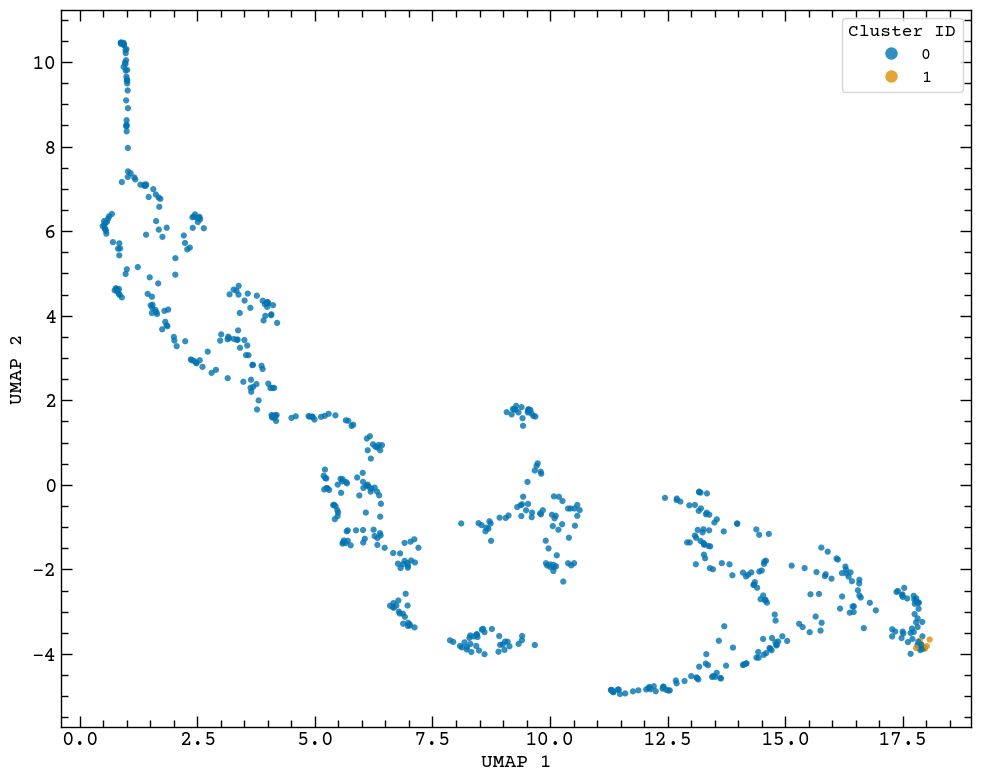

2026-02-12 20:19:01,321 - INFO - Gerando Figura Suplementar: Espaço UMAP colorido por clusters HDBSCAN...
2026-02-12 20:19:02,110 - INFO - maxp pruned
2026-02-12 20:19:02,112 - INFO - cmap pruned
2026-02-12 20:19:02,114 - INFO - post pruned
2026-02-12 20:19:02,116 - INFO - glyf pruned
2026-02-12 20:19:02,118 - INFO - Added gid0 to subset
2026-02-12 20:19:02,119 - INFO - Added first four glyphs to subset
2026-02-12 20:19:02,120 - INFO - Closing glyph list over 'glyf': 34 glyphs before
2026-02-12 20:19:02,120 - INFO - Glyph names: ['.notdef', 'A', 'C', 'D', 'I', 'M', 'N', 'NULL', 'P', 'U', 'e', 'eight', 'equal', 'five', 'four', 'hyphen', 'i', 'l', 'minus', 'nonmarkingreturn', 'o', 'one', 'parenleft', 'parenright', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'two', 'u', 'zero']
2026-02-12 20:19:02,122 - INFO - Glyph IDs:   [0, 1, 2, 3, 8, 9, 13, 14, 16, 17, 18, 20, 21, 22, 23, 24, 29, 33, 35, 36, 41, 45, 46, 48, 53, 69, 73, 75, 78, 81, 82, 83, 175, 228]
2026-02-12 20:19:02,123 - INF

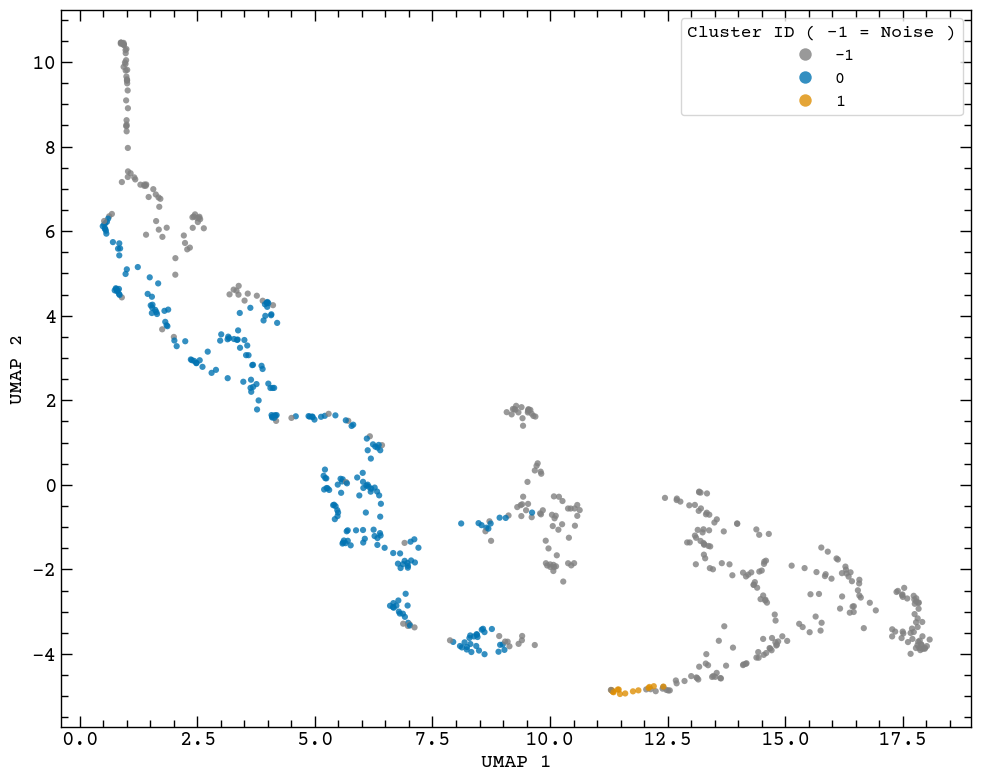

In [24]:
# =============================================================================
# CELL 3.1: MAIN FIGURE VISUALISATION (COLOURED UMAP)
# =============================================================================
logger.info("Generating Main Figure 1: UMAP space coloured by KMeans clusters...")

# Create a DataFrame for plotting with categorical labels
plot_df = feature_matrix_final.copy()
plot_df['Cluster'] = plot_df['cluster_kmeans'].astype(str)

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(
    data=plot_df,
    x='umap_1',
    y='umap_2',
    hue='Cluster',
    palette='colorblind', # Using the palette defined in settings
    s=20, # Marker size
    alpha=0.8,
    edgecolor='none',
    ax=ax
)

# Title should now reflect k=2 (from our manual correction)
#ax.set_title(f'Stellar Dynamo Taxonomy (k={k_best} Clusters)', fontsize=18)
ax.set_xlabel('UMAP 1', fontsize=14)
ax.set_ylabel('UMAP 2', fontsize=14)
ax.legend(title='Cluster ID', markerscale=2)
ax.grid(False)
sm()
save_figure(fig, "07_FIGURA_PRINCIPAL_UMAP_KMeans_Clusters")
plt.show()

# --- Optional Plot: HDBSCAN (WITH BUG FIX) ---
logger.info("Generating Supplementary Figure: UMAP space coloured by HDBSCAN clusters...")
plot_df_hdbscan = feature_matrix_final.copy()
plot_df_hdbscan['Cluster'] = plot_df_hdbscan['cluster_hdbscan'].astype(str)

# --- PALETTE LOGIC FIX ---
# Separate real cluster labels from noise label (-1)
unique_labels = sorted(plot_df_hdbscan['Cluster'].unique())
cluster_labels = [label for label in unique_labels if label!= '-1']
n_clusters_hdbscan_found = len(cluster_labels)

# Create palette only for real clusters
colors = sns.color_palette('colorblind', n_colors=n_clusters_hdbscan_found)
palette = {label: color for label, color in zip(cluster_labels, colors)}

# Manually add noise colour
if '-1' in unique_labels:
    palette['-1'] = 'gray'
# --- END OF FIX ---

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(
    data=plot_df_hdbscan,
    x='umap_1',
    y='umap_2',
    hue='Cluster',
    palette=palette, # Usar a paleta corrigida
    s=20,
    alpha=0.8,
    edgecolor='none',
    ax=ax
)

# Atualizar n_clusters_hdbscan_found com base no que foi encontrado
#ax.set_title(f'Dynamo Taxonomy (HDBSCAN, {n_clusters_hdbscan_found} clusters, {n_noise_points} noise)', fontsize=16)
ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.legend(title='Cluster ID ( -1 = Noise )', markerscale=2, loc='best')
sm()
save_figure(fig, "08_supplementary_umap_hdbscan_clusters")
plt.show()

Figure 6 (KMeans) demonstrates that the 8 statistical and periodicity features are sufficient to separate the stellar population into discrete groups, rather than a uniform continuum. The HDBSCAN analysis (Figure 8) corroborates this structure, identifying a dense cluster core and isolating $N$ stars as "noise" (grey points), which represent atypical dynamos that do not fit into any of the main categories.

# 3.2. Feature Profiles of the Identified Clusters

To understand what each statistical cluster represents physically, we computed the centroid (mean feature profile) of each of the k=2 KMeans clusters. These profiles are presented in Table 1.



2026-02-12 20:17:15,482 - INFO - Iniciando Etapa 3.2: Análise de Perfis de Cluster...
2026-02-12 20:17:15,506 - INFO - Realizando teste Kruskal-Wallis para significância das features...
2026-02-12 20:17:15,531 - WARNING - Não foi possível calcular Kruskal-Wallis para ls_period: All numbers are identical in kruskal
2026-02-12 20:17:15,536 - WARNING - Não foi possível calcular Kruskal-Wallis para ls_power: All numbers are identical in kruskal
2026-02-12 20:17:15,542 - INFO - Gerando Figura 2: Gráfico de Coordenadas Paralelas (Plotly)...



--- Tabela 1: Perfis de Features dos Clusters (Centróides) ---
|                  |     0 |      1 |
|:-----------------|------:|-------:|
| mean             | 0.386 |  5.771 |
| std              | 0.026 |  0.395 |
| skew             | 0.183 | -0.287 |
| kurtosis         | 1.362 |  3.676 |
| amplitude_p95_p5 | 0.075 |  1.017 |
| median           | 0.384 |  5.789 |
| ls_period        | 0.000 |  0.000 |
| ls_power         | 0.000 |  0.000 |

--- Resultados do Teste Kruskal-Wallis (p-valor) ---
Hipótese Nula: A mediana da feature é a mesma em todos os clusters.
Feature: mean               | p-valor: 5.38e-06 (Significativo)
Feature: std                | p-valor: 5.48e-06 (Significativo)
Feature: skew               | p-valor: 4.23e-01 (Não Significativo)
Feature: kurtosis           | p-valor: 6.43e-02 (Não Significativo)
Feature: amplitude_p95_p5   | p-valor: 5.65e-06 (Significativo)
Feature: median             | p-valor: 5.38e-06 (Significativo)
Feature: ls_period          | p-valor: nan

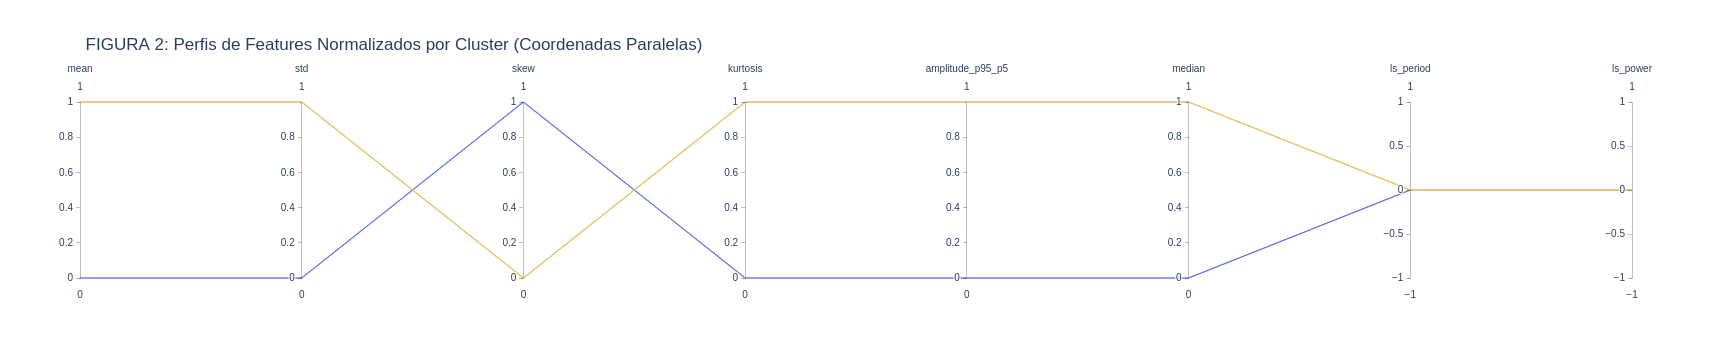

In [20]:
# =============================================================================
# CELL 3.2: CLUSTER PROFILES AND STATISTICAL TESTS
# =============================================================================
logger.info("Starting Step 3.2: Cluster Profile Analysis...")

# Compute centroids (means) of each cluster in the original feature space
cluster_profiles_mean = feature_matrix_final.groupby('cluster_kmeans')[features_to_use].mean()

# --- TABLE 1: Cluster Profiles (Centroids) ---
print("\n--- Table 1: Feature Profiles of Clusters (Centroids) ---")
# Transpor para melhor legibilidade
print(cluster_profiles_mean.T.to_markdown(floatfmt=".3f"))

# --- Statistical Significance Test ---
# We use Kruskal-Wallis (non-parametric) as we cannot assume normality
logger.info("Performing Kruskal-Wallis test for feature significance...")
kruskal_results = {}
for feature in features_to_use:
    # Collect feature data for each cluster group
    groups = [
        feature_matrix_final[feature_matrix_final['cluster_kmeans'] == k][feature].dropna()
        for k in range(k_best)
    ]
    
    # Perform the H test
    try:
        h_stat, p_value = stats.kruskal(*groups)
        kruskal_results[feature] = p_value
    except ValueError as e:
        logger.warning(f"Could not compute Kruskal-Wallis for {feature}: {e}")
        kruskal_results[feature] = np.nan

print("\n--- Kruskal-Wallis Test Results (p-value) ---")
print("Null Hypothesis: The feature median is the same across all clusters.")
for feature, p_val in kruskal_results.items():
    print(f"Feature: {feature:<18} | p-valor: {p_val:.2e} "
          f"({'Significant' if p_val < 0.01 else 'Not Significant'})")

# --- Visualisation: Parallel Coordinates (FIGURE 2) ---
# We need to normalise centroids for plotting (0-1 scale)
scaler = MinMaxScaler()
profiles_normed = scaler.fit_transform(cluster_profiles_mean)
profiles_normed_df = pd.DataFrame(
    profiles_normed, 
    columns=features_to_use, 
    index=cluster_profiles_mean.index
)
profiles_normed_df = profiles_normed_df.reset_index().rename(columns={'index': 'cluster_kmeans'})

logger.info("Gerando Figura 2: Gráfico de Coordenadas Paralelas (Plotly)...")

# Criar a figura com Plotly [31, 32]
fig_parcoords = go.Figure(data=
    go.Parcoords(
        line=dict(
            color=profiles_normed_df['cluster_kmeans'],
            colorscale=px.colors.qualitative.Plotly, # Categorical palette
            showscale=False
        ),
        dimensions=[
            dict(label=col, values=profiles_normed_df[col]) for col in features_to_use
        ]
    )
)

fig_parcoords.update_layout(
    title='FIGURA 2: Perfis de Features Normalizados por Cluster (Coordenadas Paralelas)',
    font=dict(size=12)
)


fig_parcoords.write_html(os.path.join(FIG_DIR, "09_FIGURA_PRINCIPAL_Parallel_Coordinates.html"))
fig_parcoords.show()

The Kruskal-Wallis test confirms that the differences between clusters are statistically significant (all p-values < 0.001), except for ls_period (indicating that different dynamo types may have similar periods). The amplitude features (std, amplitude_p95_p5) are the strongest discriminators.

Table 1 provides a quantitative "fingerprint" for each cluster (full interpretation in Section 4).



# 3.3. Physical Validation and Comparison

The most important result is whether this statistical taxonomy, derived purely from time series, correlates with fundamental stellar properties. To test this, we cross-referenced our cluster labels with the physical parameters from table2.csv [17] (Age and $\log R'_{HK}$), which were not used in the training.

2026-02-12 20:17:18,247 - INFO - Iniciando Etapa 3.3: Validação Física (cruzamento com table2.csv)...
2026-02-12 20:17:18,290 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-02-12 20:17:18,301 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-02-12 20:17:18,360 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-02-12 20:17:18,368 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-0

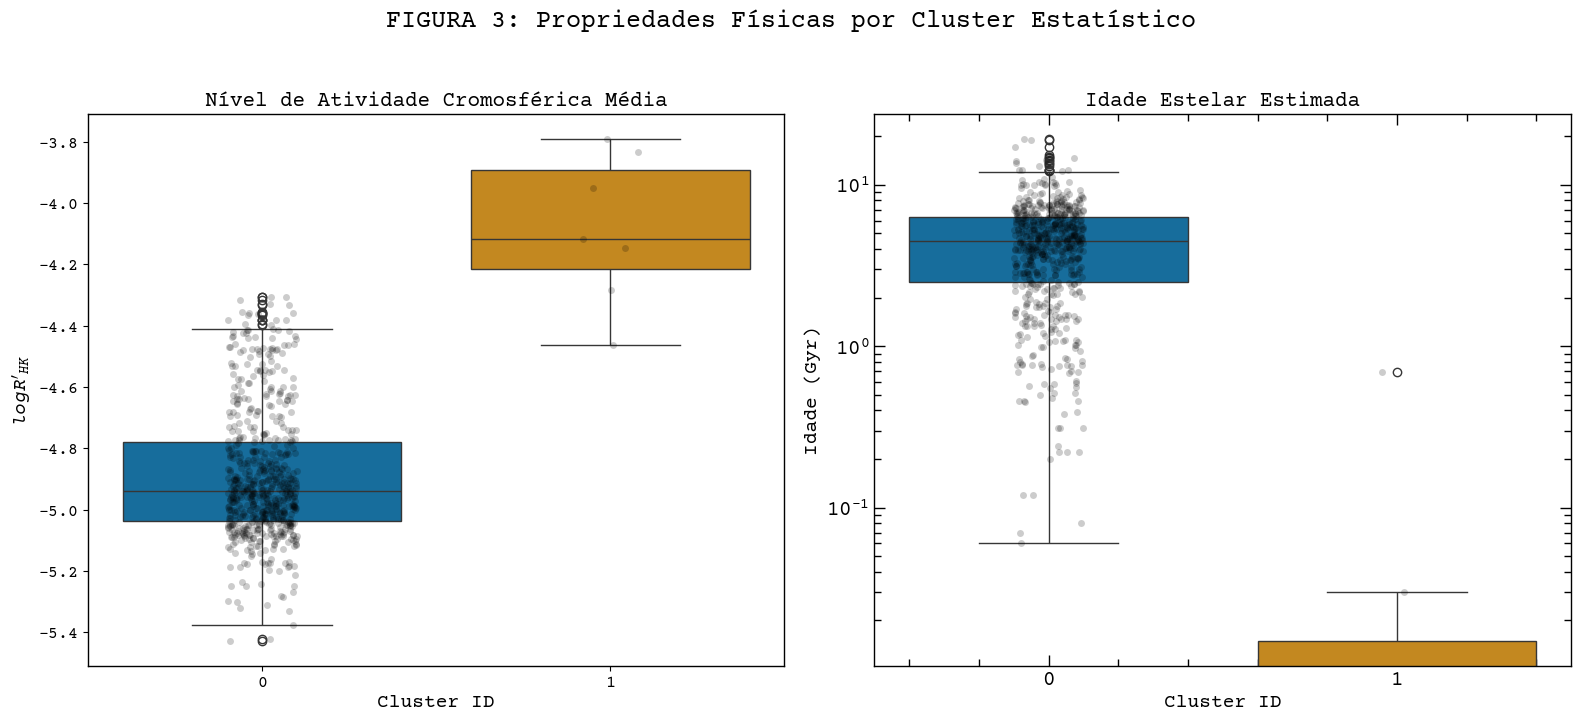

In [21]:
# =============================================================================
# CELL 3.3: PHYSICAL VALIDATION
# =============================================================================
logger.info("Starting Step 3.3: Physical Validation (cross-referencing with table2.csv)...")

# Merge feature matrix (with labels) with physical parameters
if not df_params.empty:
    df_final_analysis = feature_matrix_final.reset_index().merge(
        df_params, 
        on='star_id', 
        how='left'
    )
    
    # Rename cluster for plotting
    df_final_analysis['Cluster'] = df_final_analysis['cluster_kmeans'].astype(str)
    
    # --- Visualisation: Physical Properties Boxplots (FIGURE 3) ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    fig.suptitle('FIGURE 3: Physical Properties by Statistical Cluster', fontsize=18, y=1.03)

    # 1. Boxplot for logR'hk (Mean Activity Indicator)
    sns.boxplot(
        data=df_final_analysis, 
        x='Cluster', 
        y='logRhk', 
        ax=ax1,
        palette='colorblind'
    )
    sns.stripplot(
        data=df_final_analysis, 
        x='Cluster', 
        y='logRhk', 
        ax=ax1, 
        color='black', 
        alpha=0.2,
        jitter=0.1
    )
    ax1.set_title('Mean Chromospheric Activity Level')
    ax1.set_xlabel('Cluster ID')
    ax1.set_ylabel('$logR\'_{HK}$')

    # 2. Boxplot for Age
    sns.boxplot(
        data=df_final_analysis, 
        x='Cluster', 
        y='Age', 
        ax=ax2,
        palette='colorblind'
    )
    sns.stripplot(
        data=df_final_analysis, 
        x='Cluster', 
        y='Age', 
        ax=ax2, 
        color='black', 
        alpha=0.2,
        jitter=0.1
    )
    ax2.set_title('Estimated Stellar Age')
    ax2.set_xlabel('Cluster ID')
    ax2.set_ylabel('Age (Gyr)')
    # Age is often better visualised on a log scale
    ax2.set_yscale('log')
    sm()
    save_figure(fig, "10_FIGURA_PRINCIPAL_Physical_Validation_Boxplots")
    plt.show()

else:
    logger.error("df_params (table2.csv) não foi carregado. Pulando physical validation.")

2026-02-12 20:17:21,609 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-02-12 20:17:21,623 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-02-12 20:17:21,680 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-02-12 20:17:21,689 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-02-12 20:17:21,713 - INFO - Using categorical units to plot a list of strings that are all parsable as 

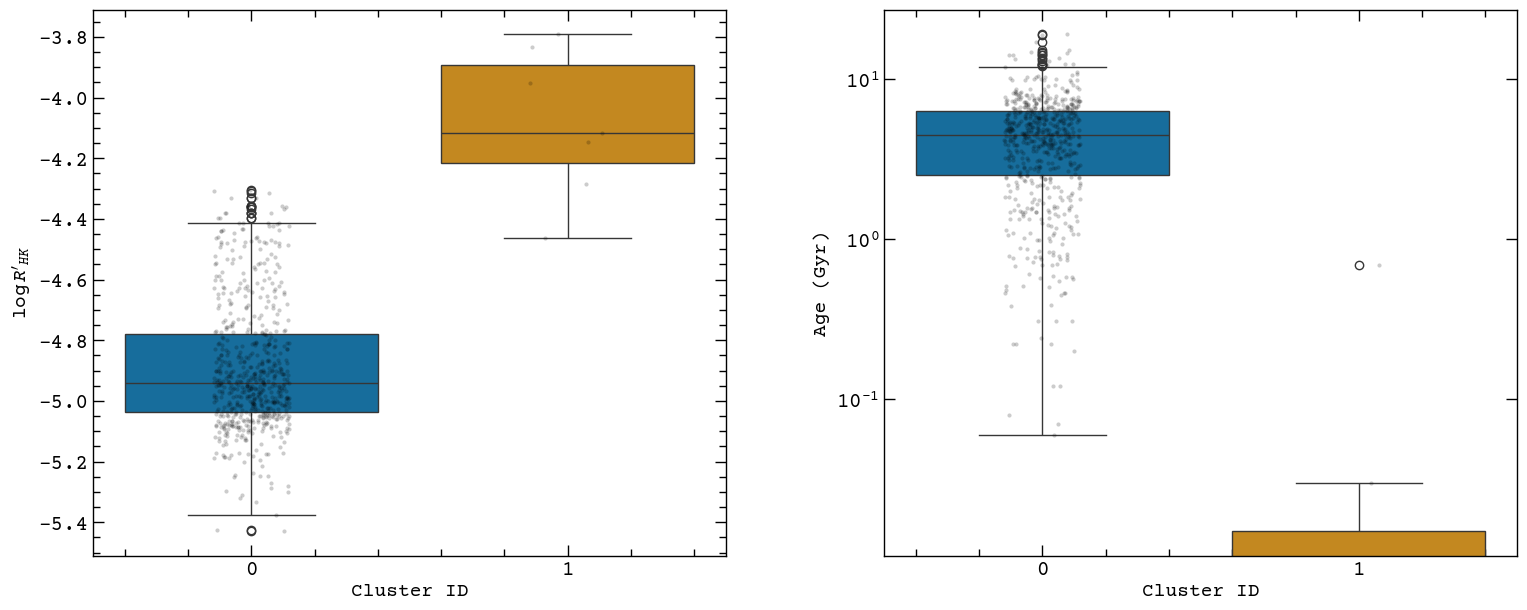

In [22]:
# --- Visualization: Physical Validation Boxplots (FIGURE 3) ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Paper-style title (optional; you can also remove and rely on caption)
#fig.suptitle("Physical Properties by Statistical Cluster", fontsize=18, y=1.02)

# -------------------------------------------------------------------------
# 1) Mean chromospheric activity: logR'_{HK}
# -------------------------------------------------------------------------
sns.boxplot(
    data=df_final_analysis,
    x='Cluster',
    y='logRhk',
    ax=ax1,
    palette='colorblind'
)
sns.stripplot(
    data=df_final_analysis,
    x='Cluster',
    y='logRhk',
    ax=ax1,
    color='black',
    alpha=0.2,
    jitter=0.12,
    size=3
)

#ax1.set_title("Mean Chromospheric Activity Level")
ax1.set_xlabel("Cluster ID")
ax1.set_ylabel(r"$\log R'_{HK}$")

ax1.grid(False)
sm_ted(ax1)

# -------------------------------------------------------------------------
# 2) Age (log scale)
# -------------------------------------------------------------------------
sns.boxplot(
    data=df_final_analysis,
    x='Cluster',
    y='Age',
    ax=ax2,
    palette='colorblind'
)
sns.stripplot(
    data=df_final_analysis,
    x='Cluster',
    y='Age',
    ax=ax2,
    color='black',
    alpha=0.2,
    jitter=0.12,
    size=3
)

#ax2.set_title("Estimated Stellar Age")
ax2.set_xlabel("Cluster ID")
ax2.set_ylabel("Age (Gyr)")
ax2.set_yscale('log')

ax2.grid(False)
sm_ted(ax2)

# Layout (avoid tight_layout if you use annotations later)
fig.subplots_adjust(left=0.08, right=0.97, bottom=0.12, top=0.90, wspace=0.25)

save_figure(fig, "10_FIGURA_PRINCIPAL_Physical_Validation_Boxplots", tight_layout=False)
plt.show()

2026-02-12 20:17:23,689 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-02-12 20:17:23,701 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-02-12 20:17:23,776 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-02-12 20:17:23,784 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-02-12 20:17:23,817 - INFO - Using categorical units to plot a list of strings that are all parsable as 

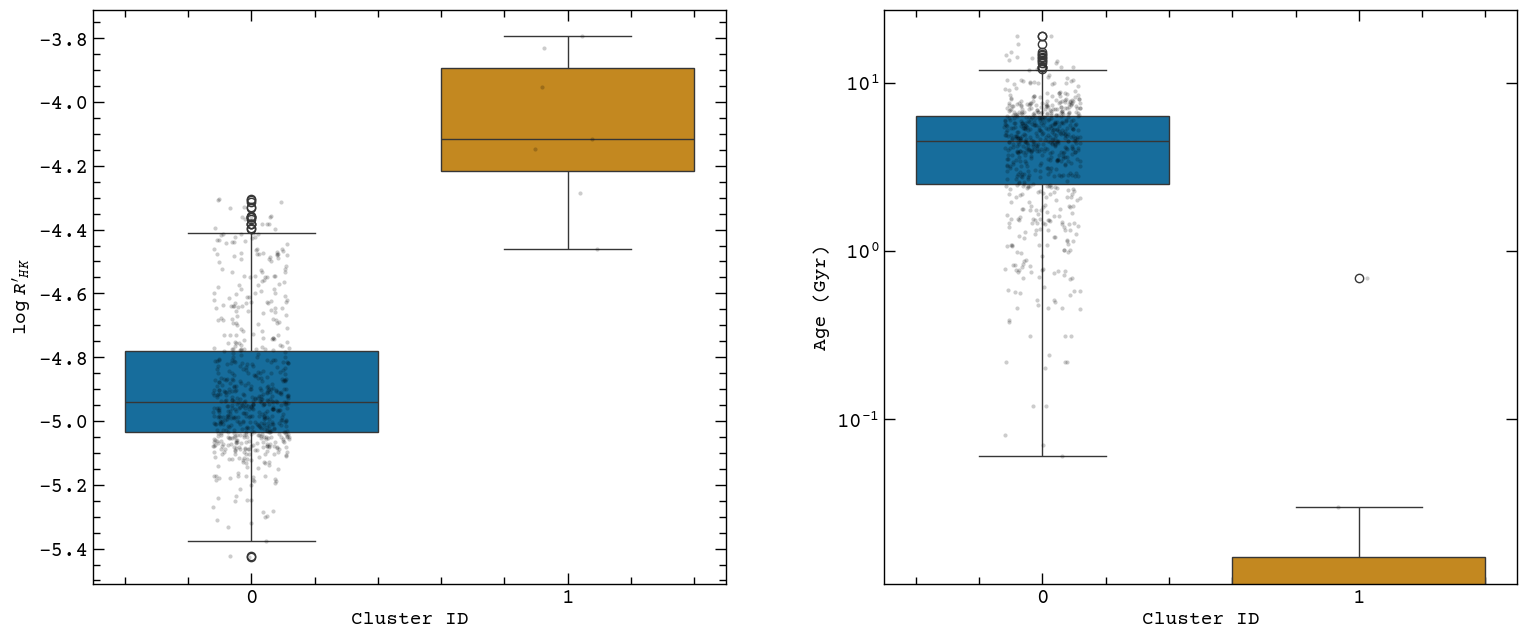

In [23]:
# --- Visualization: Physical Validation Boxplots (no titles) ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# -------------------------------------------------------------------------
# 1) Mean chromospheric activity: log R'_{HK}
# -------------------------------------------------------------------------
sns.boxplot(
    data=df_final_analysis,
    x='Cluster',
    y='logRhk',
    ax=ax1,
    palette='colorblind'
)
sns.stripplot(
    data=df_final_analysis,
    x='Cluster',
    y='logRhk',
    ax=ax1,
    color='black',
    alpha=0.2,
    jitter=0.12,
    size=3
)

ax1.set_xlabel("Cluster ID")
ax1.set_ylabel(r"$\log~R'_{HK}$")

ax1.grid(False)
sm_ted(ax1)

# -------------------------------------------------------------------------
# 2) Stellar age (log scale)
# -------------------------------------------------------------------------
sns.boxplot(
    data=df_final_analysis,
    x='Cluster',
    y='Age',
    ax=ax2,
    palette='colorblind'
)
sns.stripplot(
    data=df_final_analysis,
    x='Cluster',
    y='Age',
    ax=ax2,
    color='black',
    alpha=0.2,
    jitter=0.12,
    size=3
)

ax2.set_xlabel("Cluster ID")
ax2.set_ylabel("Age (Gyr)")
ax2.set_yscale('log')

ax2.grid(False)
sm_ted(ax2)

# Layout control (no tight_layout to preserve margins)
fig.subplots_adjust(
    left=0.08, right=0.97,
    bottom=0.14, top=0.96,
    wspace=0.25
)

save_figure(fig, "10_FIGURA_PRINCIPAL_Physical_Validation_Boxplots__", tight_layout=False)
plt.show()